In [1]:
##############################################################
##############################################################
##
## script to quantify the genotype and FoxA2, markers in TetOn-TetOn NT
## 
##############################################################
##############################################################

In [2]:
from skimage.io import imread
from skimage.io import imsave
from skimage import filters
from skimage import morphology
from pyclesperanto_prototype import imshow
import pyclesperanto_prototype as cle
import matplotlib.pyplot as plt

In [3]:
import napari
from napari.utils import nbscreenshot

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from skimage import measure
import os
os.getcwd()

'/groups/tanaka/People/current/jiwang/projects/RA_competence/scripts'

In [5]:
def show(image_to_show, labels=False):
    """
    This function generates three projections: in X-, Y- and Z-direction and shows them.
    """
    projection_x = cle.maximum_x_projection(image_to_show)
    projection_y = cle.maximum_y_projection(image_to_show)
    projection_z = cle.maximum_z_projection(image_to_show)

    fig, axs = plt.subplots(1, 3, figsize=(15, 15))
    cle.imshow(projection_x, plot=axs[0], labels=labels)
    cle.imshow(projection_y, plot=axs[1], labels=labels)
    cle.imshow(projection_z, plot=axs[2], labels=labels)
    plt.show()


In [6]:
import pandas as pd
from skimage import measure
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
import pyclesperanto_prototype as cle
from skimage import filters
from skimage.filters import try_all_threshold
import napari_simpleitk_image_processing as nsitk

In [7]:
############################################################
###
### FoxA2-TetOn Pax6-TetOn d3, d4, d6  
### quantifying the FoxA2-KO and Pax6-KO genotypes and the FoxA2 and Pax6 voxels based on the masked and cyst-level background 
###
############################################################

In [8]:
imageDir = "../images_data/d3-4-6_10x_TetOnF_TetOnP_chim_fulldataset/d3-4-6_stain-FA2-Px6/d4"
outDir = "../images_data/results/TetOnF_TetOnP_chim_d3_4_5_genotype_FoxA2_Pax6"

if not os.path.exists(outDir):
    os.mkdir(outDir)
#os.path.exists(outDir)

In [153]:
#fileName = '241023_10x_d3-2umZ_1-FS-PG_RA_FA2-Px6_C7_13_01_isotropic'
fileName = "241011_10x_d4-P6-FA2_iF-iP_dox_D7_25_01_isotropic"

In [154]:
mask = imread(os.path.join(imageDir, str(fileName + "_C5_CystMask.tiff"))) # mask segmeted cysts
C1 = imread(os.path.join(imageDir, str(fileName + "_C1.tif"))) # FoxA2, nuclei
C2 = imread(os.path.join(imageDir, str(fileName + "_C2.tif"))) # FoxA2-KO genotype Scarlet, nuclei
C3 = imread(os.path.join(imageDir, str(fileName + "_C3.tif"))) # Pax6-KO genotype 
C4 = imread(os.path.join(imageDir, str(fileName + "_C4.tif"))) # Pax6, nuclei

In [155]:
C1 = C1 / np.quantile(C1, 0.95)
C2 = C2 / np.quantile(C2, 0.95)
C3 = C3 / np.quantile(C3, 0.95)
C4 = C4 / np.quantile(C4, 0.95)

In [156]:
cutoff_pxko = threshold_otsu(C3)
cutoff_fako = threshold_otsu(C2)
cutoff_foxa2 = threshold_otsu(C1)
cutoff_pax6 = threshold_otsu(C4)
print(cutoff_pxko, cutoff_fako, cutoff_foxa2, cutoff_pax6)

cutoff_pxko = filters.threshold_li(C3)
cutoff_fako = filters.threshold_li(C2)
cutoff_foxa2 = filters.threshold_li(C1)
cutoff_pax6 = filters.threshold_li(C4)
print(cutoff_pxko, cutoff_fako, cutoff_foxa2, cutoff_pax6)

cutoff_pxko = filters.threshold_isodata(C3)
cutoff_fako = filters.threshold_isodata(C2)
cutoff_foxa2 = filters.threshold_isodata(C1)
cutoff_pax6 = filters.threshold_isodata(C4)
print(cutoff_pxko, cutoff_fako, cutoff_foxa2, cutoff_pax6)

0.9769201510053174 2.388290777439024 2.4245577033069887 0.6062390819099378
0.3137585013592943 0.8576986661545347 0.8107213309099232 0.42129085273056605
0.9769201510053174 2.2983199949186988 2.2137989418677204 0.6062390819099378


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]


In [157]:
from skimage import measure
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
import pyclesperanto_prototype as cle
from skimage import filters
from skimage.filters import try_all_threshold
import napari_simpleitk_image_processing as nsitk

In [158]:
labels_mask, nb_cyst = measure.label(mask, return_num = True)
nb_cyst 

50

In [203]:
i = 8

In [204]:
cyst_index = np.where(labels_mask == i)
#print(cyst_index[0].size)
genotype_fako = C2[cyst_index]
genotype_pxko = C3[cyst_index]
foxa2 = C1[cyst_index]
pax6 = C4[cyst_index]

In [205]:
cutoff_pxko = threshold_otsu(genotype_pxko)
cutoff_fako = threshold_otsu(genotype_fako)
cutoff_foxa2 = threshold_otsu(foxa2)
cutoff_pax6 = threshold_otsu(pax6)
print(cutoff_pxko, cutoff_fako, cutoff_foxa2, cutoff_pax6)

index_foxa2_cyst = np.where((foxa2 > cutoff_foxa2) & (pax6 < cutoff_pax6))
index_pax6_cyst = np.where((foxa2 < cutoff_foxa2) & (pax6 > cutoff_pax6))
index_double = np.where((foxa2 >= cutoff_foxa2) & (pax6 >= cutoff_pax6))

print((index_fako_cyst[0].size/ (index_fako_cyst[0].size + index_pxko_cyst[0].size)), index_foxa2_cyst[0].size/(index_pax6_cyst[0].size + index_foxa2_cyst[0].size), 
    (index_foxa2_cyst[0].size + index_double[0].size)/(index_pax6_cyst[0].size + index_foxa2_cyst[0].size + index_double[0].size) )

1.282672722160898 1.7990186737804876 2.1092856307196337 0.7985491071428572
0.8185208203853325 0.2358404277773869 0.45435820145692035


In [206]:
## entropy-based li
cutoff_pxko = filters.threshold_li(genotype_pxko)
cutoff_fako = filters.threshold_li(genotype_fako)
cutoff_foxa2 = filters.threshold_li(foxa2)
cutoff_pax6 = filters.threshold_li(pax6)
print(cutoff_pxko, cutoff_fako, cutoff_foxa2, cutoff_pax6)

index_foxa2_cyst = np.where((foxa2 > cutoff_foxa2) & (pax6 < cutoff_pax6))
index_pax6_cyst = np.where((foxa2 < cutoff_foxa2) & (pax6 > cutoff_pax6))
index_double = np.where((foxa2 >= cutoff_foxa2) & (pax6 >= cutoff_pax6))

print((index_fako_cyst[0].size/ (index_fako_cyst[0].size + index_pxko_cyst[0].size)), index_foxa2_cyst[0].size/(index_pax6_cyst[0].size + index_foxa2_cyst[0].size), 
    (index_foxa2_cyst[0].size + index_double[0].size)/(index_pax6_cyst[0].size + index_foxa2_cyst[0].size + index_double[0].size) )

0.8118496814113194 1.32577076867637 1.5955744510703536 0.6659099169474746
0.8185208203853325 0.1896107829774345 0.5471394719025051


In [207]:
## another entropy-based 
cutoff_pxko = filters.threshold_yen(genotype_pxko)
cutoff_fako = filters.threshold_yen(genotype_fako)
cutoff_foxa2 = filters.threshold_yen(foxa2)
cutoff_pax6 = filters.threshold_yen(pax6)
print(cutoff_pxko, cutoff_fako, cutoff_foxa2, cutoff_pax6)

index_foxa2_cyst = np.where((foxa2 > cutoff_foxa2) & (pax6 < cutoff_pax6))
index_pax6_cyst = np.where((foxa2 < cutoff_foxa2) & (pax6 > cutoff_pax6))
index_double = np.where((foxa2 >= cutoff_foxa2) & (pax6 >= cutoff_pax6))

print((index_fako_cyst[0].size/ (index_fako_cyst[0].size + index_pxko_cyst[0].size)), index_foxa2_cyst[0].size/(index_pax6_cyst[0].size + index_foxa2_cyst[0].size), 
    (index_foxa2_cyst[0].size + index_double[0].size)/(index_pax6_cyst[0].size + index_foxa2_cyst[0].size + index_double[0].size) )

1.1130020466873187 4.164205411585366 3.8191019524750414 1.7605541537267082
0.8185208203853325 0.6507319988049 0.651044776119403


In [208]:
cutoff_pxko = filters.threshold_mean(genotype_pxko)
cutoff_fako = filters.threshold_mean(genotype_fako)
cutoff_foxa2 = filters.threshold_mean(foxa2)
cutoff_pax6 = filters.threshold_mean(pax6)
#print(cutoff_pxko, cutoff_fako, cutoff_foxa2, cutoff_pax6)
index_fako_cyst = np.where((genotype_fako > cutoff_fako) & (genotype_pxko < cutoff_pxko))
index_pxko_cyst = np.where((genotype_pxko > cutoff_pxko) & (genotype_fako < cutoff_fako))
index_foxa2_cyst = np.where((foxa2 > cutoff_foxa2) & (pax6 < cutoff_pax6))
index_pax6_cyst = np.where((foxa2 < cutoff_foxa2) & (pax6 > cutoff_pax6))
index_double = np.where((foxa2 >= cutoff_foxa2) & (pax6 >= cutoff_pax6))

print((index_fako_cyst[0].size/ (index_fako_cyst[0].size + index_pxko_cyst[0].size)), index_foxa2_cyst[0].size/(index_pax6_cyst[0].size + index_foxa2_cyst[0].size), 
    (index_foxa2_cyst[0].size + index_double[0].size)/(index_pax6_cyst[0].size + index_foxa2_cyst[0].size + index_double[0].size) )

0.5038982736216818 0.3523069023692511 0.6070315976858033


In [21]:
i

1

In [ ]:
sels = np.where((genotype_pxko > cutoff_pxko) | (genotype_fako > cutoff_fako))
genotype_pxko_sels = genotype_pxko[sels]
genotype_fako_sels = genotype_fako[sels]
pax6_sels = pax6[sels]
foxa2_sels = foxa2[sels]

In [ ]:
# specify the FoxA2-KO and Pax6-KO genotype voxels 
index_pxko = np.where(genotype_pxko_sels > genotype_fako_sels)
index_fako = np.where(genotype_pxko_sels < genotype_fako_sels)

index_pxko[0].size/(index_pxko[0].size + index_fako[0].size)

In [ ]:
foxa2_fako = foxa2_sels[index_fako]
pax6_fako = pax6_sels[index_fako]
index_foxa2_fako = np.where((foxa2_fako > cutoff_foxa2) & (pax6_fako < cutoff_pax6))
index_pax6_fako = np.where((foxa2_fako < cutoff_foxa2) & (pax6_fako > cutoff_pax6))
index_foxa2_fako[0].size, index_pax6_fako[0].size

In [ ]:
foxa2_pxko = foxa2_sels[index_pxko]
pax6_pxko = pax6_sels[index_pxko]
index_foxa2_pxko = np.where((foxa2_pxko > cutoff_foxa2) & (pax6_pxko < cutoff_pax6))
index_pax6_pxko = np.where((foxa2_pxko < cutoff_foxa2) & (pax6_pxko > cutoff_pax6))
index_pax6_pxko[0].size, index_foxa2_pxko[0].size

In [ ]:
#fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3.5))
#ax = axes.ravel()
#ax[0].imshow(, cmap='gray')
#ax[0].set_title('Original')
#ax[0].axis('off')
plt.hist(C4.ravel(), bins=200)
plt.axvline(cutoff_pax6, color='r')
#plt.hist(a, bins='auto')  # arguments are passed to np.histogram
#plt.title("Histogram with 'auto' bins")
plt.ylim([0, 500000])
#plt.xlim([0, 16])
#plt.ylim([0, 2])
plt.show()


In [ ]:
plt.hist(C2.ravel(), bins=200)
plt.axvline(cutoff_fako, color='r')
plt.ylim([0, 100000])
#plt.hist(a, bins='auto')  # arguments are passed to np.histogram
#plt.title("Histogram with 'auto' bins")
plt.show()

In [24]:
import pandas as pd
from skimage import measure
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from skimage import measure
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
import pyclesperanto_prototype as cle
from skimage import filters
from skimage.filters import try_all_threshold
import napari_simpleitk_image_processing as nsitk

from skimage import measure
data = {"image": [], "cyst_index": [], "cyst_size": [], 
         "nb_fxko_global": [], "nb_pxko_global": [], "nb_foxa2_global": [], "nb_pax6_global": [],
         "cutoff_fxko_image": [],  "cutoff_pxko_image": [], "cutoff_foxa2_image": [], "cutoff_pax6_image": [],
        "nb_fxko_cyst": [], "nb_pxko_cyst": [], "nb_foxa2_cyst": [], "nb_pax6_cyst": [], "nb_double_cyst": [],
        "genotype_total": [],  "nb_fxko": [], "nb_pxko": [], "fxko_nb_foxa2": [], "fxko_nb_pax6": [],  
        "pxko_nb_foxa2": [], "pxko_nb_pax6": [],
        "cutoff_fxko": [],  "cutoff_pxko": [],  "cutoff_foxa2": [],  "cutoff_pax6": [],
        "quantile95_fako_image": [], "quantile95_pxko_image": [], "quantile95_foxa2_image":[], "quantile95_pax6_image":[], 
        "quantile95_fako":[], "quantile95_pxko":[], "quantile95_foxa2":[], "quantile95_pax6":[]
       }
df = pd.DataFrame(data)
df

,image,cyst_index,cyst_size,nb_fxko_global,nb_pxko_global,nb_foxa2_global,nb_pax6_global,cutoff_fxko_image,cutoff_pxko_image,cutoff_foxa2_image,...,cutoff_foxa2,cutoff_pax6,quantile95_fako_image,quantile95_pxko_image,quantile95_foxa2_image,quantile95_pax6_image,quantile95_fako,quantile95_pxko,quantile95_foxa2,quantile95_pax6


In [25]:
for nm in os.listdir(imageDir):
    if "_C5_CystMask.tiff" in nm:
        #print(nm)
        fileName = nm.replace('_C5_CystMask.tiff','')
        #files += [nm]
        print(fileName)
        #make_composite_C5(newName, ImageDir, outDir)
        
        mask = imread(os.path.join(imageDir, str(fileName + "_C5_CystMask.tiff"))) # mask segmeted cysts
        C1 = imread(os.path.join(imageDir, str(fileName + "_C1.tif"))) # FoxA2, nuclei
        C2 = imread(os.path.join(imageDir, str(fileName + "_C2.tif"))) # FoxA2-KO genotype Scarlet, nuclei
        C3 = imread(os.path.join(imageDir, str(fileName + "_C3.tif"))) # Pax6-KO genotype 
        C4 = imread(os.path.join(imageDir, str(fileName + "_C4.tif"))) # Pax6, nuclei
        
        C1 = C1 / np.quantile(C1, 0.95)
        C2 = C2 / np.quantile(C2, 0.95)
        C3 = C3 / np.quantile(C3, 0.95)
        C4 = C4 / np.quantile(C4, 0.95)
        
        labels_mask, nb_cyst = measure.label(mask, return_num = True)
        
        #cutoff_fako_image = threshold_otsu(C2)
        #cutoff_pxko_image = threshold_otsu(C3)
        #cutoff_foxa2_image = threshold_otsu(C1)
        #cutoff_pax6_image = threshold_otsu(C4)
        cutoff_fako_image = filters.threshold_mean(C2)
        cutoff_pxko_image = filters.threshold_mean(C3)
        cutoff_foxa2_image = filters.threshold_mean(C1)
        cutoff_pax6_image = filters.threshold_mean(C4)
        
        
        quantile95_fako_image = np.quantile(C2, 0.95)
        quantile95_pxko_image = np.quantile(C3, 0.95)
        quantile95_foxa2_image = np.quantile(C1, 0.95)
        quantile95_pax6_image = np.quantile(C4, 0.95)
        
        
        for i in range(nb_cyst+1):
            if i > 0:
                cyst_index = np.where(labels_mask == i)
                
                genotype_pxko = C3[cyst_index]
                genotype_fako = C2[cyst_index]
                pax6 = C4[cyst_index]
                foxa2 = C1[cyst_index]
                                
                # counting using the image-based thresholds
                index_fako_global = np.where((genotype_fako > cutoff_fako_image) & (genotype_pxko < cutoff_pxko_image))
                index_pxko_global = np.where((genotype_pxko > cutoff_pxko_image) & (genotype_fako < cutoff_fako_image))
                index_foxa2_global = np.where((foxa2 > cutoff_foxa2_image) & (pax6 < cutoff_pax6_image))
                index_pax6_global = np.where((foxa2 < cutoff_foxa2_image) & (pax6 > cutoff_pax6_image))
                
                ## calculate the cyst-based thresholds
                #cutoff_fako = threshold_otsu(genotype_fako)
                #cutoff_pxko = threshold_otsu(genotype_pxko)
                #cutoff_foxa2 = threshold_otsu(foxa2)
                #cutoff_pax6 = threshold_otsu(pax6)
                cutoff_fako = filters.threshold_mean(genotype_fako)
                cutoff_pxko = filters.threshold_mean(genotype_pxko)
                cutoff_foxa2 = filters.threshold_mean(foxa2)
                cutoff_pax6 = filters.threshold_mean(pax6)
                
                
                quantile95_fako = np.quantile(genotype_fako, 0.95)
                quantile95_pxko = np.quantile(genotype_pxko, 0.95)
                quantile95_foxa2 = np.quantile(foxa2, 0.95)
                quantile95_pax6 = np.quantile(pax6, 0.95)
                
                # count the foxa2+ and pax6+ voxels in the whole cyst
                index_fako_cyst = np.where((genotype_fako > cutoff_fako) & (genotype_pxko < cutoff_pxko))
                index_pxko_cyst = np.where((genotype_pxko > cutoff_pxko) & (genotype_fako < cutoff_fako))
                
                index_foxa2_cyst = np.where((foxa2 > cutoff_foxa2) & (pax6 < cutoff_pax6))
                index_pax6_cyst = np.where((foxa2 < cutoff_foxa2) & (pax6 > cutoff_pax6))
                index_double_cyst = np.where((foxa2 >= cutoff_foxa2) & (pax6 >= cutoff_pax6))
                
                #sels = np.where((genotype_pxko > cutoff_pxko) | (genotype_fako > cutoff_fako))
                #genotype_pxko_sels = genotype_pxko[sels]
                #genotype_fako_sels = genotype_fako[sels]
                #pax6_sels = pax6[sels]
                #foxa2_sels = foxa2[sels]
                
                # specify the FoxA2-KO and Pax6-KO genotype voxels 
                #index_pxko = np.where(genotype_pxko_sels > genotype_fako_sels)
                #index_fako = np.where(genotype_pxko_sels < genotype_fako_sels)
                #index_pxko[0].size/(index_pxko[0].size + index_fako[0].size)
                
                foxa2_fako = foxa2[index_fako_cyst]
                pax6_fako = pax6[index_fako_cyst]
                foxa2_pxko = foxa2[index_pxko_cyst]
                pax6_pxko = pax6[index_pxko_cyst]
                
                index_foxa2_fako = np.where((foxa2_fako > cutoff_foxa2) & (pax6_fako < cutoff_pax6))
                index_pax6_fako = np.where((foxa2_fako < cutoff_foxa2) & (pax6_fako > cutoff_pax6))
                #index_foxa2_fako[0].size, index_pax6_fako[0].size
                
                index_foxa2_pxko = np.where((foxa2_pxko > cutoff_foxa2) & (pax6_pxko < cutoff_pax6))
                index_pax6_pxko = np.where((foxa2_pxko < cutoff_foxa2) & (pax6_pxko > cutoff_pax6))
                #index_pax6_pxko[0].size, index_foxa2_pxko[0].size
                
                #print(index_foxa2_fako[0].size, index_pax6_pxko[0].size)
                
                genotype_total = index_fako_cyst[0].size + index_pxko_cyst[0].size
                
                if (genotype_total) > 100:
                    df.loc[len(df)] = [fileName, i,  
                                        cyst_index[0].size,
                                        index_fako_global[0].size, index_pxko_global[0].size, index_foxa2_global[0].size, index_pax6_global[0].size,
                                        cutoff_fako_image, cutoff_pxko_image, cutoff_foxa2_image, cutoff_pax6_image,
                                        index_fako_cyst[0].size, index_pxko_cyst[0].size, index_foxa2_cyst[0].size, index_pax6_cyst[0].size, index_double_cyst[0].size,
                                        genotype_total,
                                        index_fako_cyst[0].size,  
                                        index_pxko_cyst[0].size,
                                        index_foxa2_fako[0].size,  index_pax6_fako[0].size, 
                                        index_foxa2_pxko[0].size,  index_pax6_pxko[0].size, 
                                        cutoff_fako, cutoff_pxko, cutoff_foxa2, cutoff_pax6,
                                        quantile95_fako_image, quantile95_pxko_image, quantile95_foxa2_image, quantile95_pax6_image, 
                                        quantile95_fako, quantile95_pxko, quantile95_foxa2, quantile95_pax6
                                        ]
                                    

241011_10x_d4-P6-FA2_iF-iP_dox_D7_25_01_isotropic
241011_10x_d4-P6-FA2_iF-iP_dox_D7_26_01_isotropic
241011_10x_d4-P6-FA2_iF-iP_dox_D7_27_01_isotropic
241011_10x_d4-P6-FA2_iF-iP_dox_D7_28_01_isotropic
241011_10x_d4-P6-FA2_iF-iP_dox_D8_29_01_isotropic
241011_10x_d4-P6-FA2_iF-iP_dox_D8_30_01_isotropic
241011_10x_d4-P6-FA2_iF-iP_dox_D8_31_01_isotropic
241011_10x_d4-P6-FA2_iF-iP_dox_D8_32_01_isotropic
241011_10x_d4-P6-FA2_iF-iP_dox_D9_33_01_isotropic
241011_10x_d4-P6-FA2_iF-iP_dox_D9_34_01_isotropic
241011_10x_d4-P6-FA2_iF-iP_dox_D9_35_01_isotropic
241011_10x_d4-P6-FA2_iF-iP_dox_D9_36_01_isotropic
241011_10x_d4-P6-FA2_iF-iP_noRA_D1_1_01_isotropic
241011_10x_d4-P6-FA2_iF-iP_noRA_D1_2_01_isotropic
241011_10x_d4-P6-FA2_iF-iP_noRA_D1_3_01_isotropic
241011_10x_d4-P6-FA2_iF-iP_noRA_D1_4_01_isotropic
241011_10x_d4-P6-FA2_iF-iP_noRA_D2_5_01_isotropic
241011_10x_d4-P6-FA2_iF-iP_noRA_D2_6_01_isotropic
241011_10x_d4-P6-FA2_iF-iP_noRA_D2_7_01_isotropic
241011_10x_d4-P6-FA2_iF-iP_noRA_D2_8_01_isotropic


In [26]:
df 

,image,cyst_index,cyst_size,nb_fxko_global,nb_pxko_global,nb_foxa2_global,nb_pax6_global,cutoff_fxko_image,cutoff_pxko_image,cutoff_foxa2_image,...,cutoff_foxa2,cutoff_pax6,quantile95_fako_image,quantile95_pxko_image,quantile95_foxa2_image,quantile95_pax6_image,quantile95_fako,quantile95_pxko,quantile95_foxa2,quantile95_pax6
0,241011_10x_d4-P6-FA2_iF-iP_dox_D7_25_01_isotropic,1,5396,4856,0,156,65,0.259251,0.134503,0.260696,...,2.109133,0.464634,1.0,1.0,1.0,1.0,4.610772,0.009068,4.620632,0.723602
1,241011_10x_d4-P6-FA2_iF-iP_dox_D7_25_01_isotropic,2,32016,19778,91,255,670,0.259251,0.134503,0.260696,...,3.399961,0.767006,1.0,1.0,1.0,1.0,7.634146,1.093114,9.002912,1.450311
2,241011_10x_d4-P6-FA2_iF-iP_dox_D7_25_01_isotropic,3,54432,2473,19648,39,942,0.259251,0.134503,0.260696,...,1.833630,1.000407,1.0,1.0,1.0,1.0,3.365854,1.785902,5.818636,1.622516
3,241011_10x_d4-P6-FA2_iF-iP_dox_D7_25_01_isotropic,4,7252,7237,0,53,13,0.259251,0.134503,0.260696,...,2.230927,0.461234,1.0,1.0,1.0,1.0,4.699187,0.006457,4.367013,0.611801
4,241011_10x_d4-P6-FA2_iF-iP_dox_D7_25_01_isotropic,5,80532,10164,51348,459,8039,0.259251,0.134503,0.260696,...,1.226187,0.747635,1.0,1.0,1.0,1.0,2.406504,2.041511,4.064434,1.322981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2223,241011_10x_d4-P6-FA2_iF-iP_RA_D6_24_01_isotropic,55,38144,31845,102,112,594,0.234250,0.203326,0.244639,...,0.745029,1.214042,1.0,1.0,1.0,1.0,3.232472,0.844316,1.283214,2.307087
2224,241011_10x_d4-P6-FA2_iF-iP_RA_D6_24_01_isotropic,57,8500,0,8403,67,564,0.234250,0.203326,0.244639,...,0.618620,1.327185,1.0,1.0,1.0,1.0,0.092251,4.968252,0.946612,2.598425
2225,241011_10x_d4-P6-FA2_iF-iP_RA_D6_24_01_isotropic,58,1368,7,742,49,0,0.234250,0.203326,0.244639,...,0.730295,0.511722,1.0,1.0,1.0,1.0,0.439114,4.921659,1.077259,0.846457
2226,241011_10x_d4-P6-FA2_iF-iP_RA_D6_24_01_isotropic,59,2036,0,1270,0,0,0.234250,0.203326,0.244639,...,1.579622,1.113911,1.0,1.0,1.0,1.0,0.487085,3.263595,3.313655,1.923228


In [27]:
outDir, imageDir

('../images_data/results/TetOnF_TetOnP_chim_d3_4_5_genotype_FoxA2_Pax6',
 '../images_data/d3-4-6_10x_TetOnF_TetOnP_chim_fulldataset/d3-4-6_stain-FA2-Px6/d4')

In [28]:
df.to_csv(os.path.join(outDir, "cyst_size_genotype_FoxA2_Pax6_cystThresholds_globalThreshold_quantile_normalization_refineGenotype_thresholdMean_v2.csv"), index=True, header=True)

In [ ]:
############################################################
###
### TetOn-FoxA2 & TetOn-Pax6 day6 stain DV patterning
### quantifying the TetOn-FoxA2 & TetOn-Pax6 genotypes and the selected markers Nk22-Shh voxels based on the masked and cyst-level background 
###
############################################################

In [8]:
imageDir = "../images_data/d3-4-6_10x_TetOnF_TetOnP_chim_fulldataset/d6_stain-DV-patterning"
outDir = "../images_data/results/TetOnF_TetOnP_chim_d6_genotype_stainDVpatterning"

if not os.path.exists(outDir):
    os.mkdir(outDir)
#os.path.exists(outDir)

In [9]:
from skimage import filters

In [10]:
#fileName = '241023_10x_d3-2umZ_1-FS-PG_RA_FA2-Px6_C7_13_01_isotropic'
#fileName = "241010_10x_d6-Nk22-Shh_iF-iP_RA_D4_13_01_isotropic"
#fileName = "241010_10x_d6-Nk22-Shh_iF-iP_noRA_D3_9_01_isotropic"
#fileName = "241010_10x_d6-Nk22-Shh_iF-iP_RA_D5_19_01_isotropic"
fileName = "241010_10x_d6-Nk22-Shh_iF-iP_RA_D4_13_01_isotropic"
fileName = "241010_10x_d6-Nk22-Shh_iF-iP_RA_D4_13_01_isotropic"

In [23]:
mask = imread(os.path.join(imageDir, str(fileName + "_C5_CystMask.tiff"))) # mask segmeted cysts
C1 = imread(os.path.join(imageDir, str(fileName + "_C1.tif"))) # FoxA2, nuclei
C2 = imread(os.path.join(imageDir, str(fileName + "_C2.tif"))) # FoxA2-KO genotype Scarlet, nuclei
C3 = imread(os.path.join(imageDir, str(fileName + "_C3.tif"))) # Pax6-KO genotype
C4 = imread(os.path.join(imageDir, str(fileName + "_C4.tif"))) # Pax6 or other markers

In [24]:
print(np.quantile(C1, 0.95), np.quantile(C4, 0.95))
#C1 = C1 / np.quantile(C1, 0.95)
C2 = C2 / np.quantile(C2, 0.95)
C3 = C3 / np.quantile(C3, 0.95)
#C4 = C4 / np.quantile(C4, 0.95)

559.0 188.0


In [25]:
cutoff_pxko = filters.threshold_otsu(C3)
cutoff_fako = filters.threshold_otsu(C2)

cutoff_foxa2 = filters.threshold_otsu(C1)
cutoff_pax6 = filters.threshold_otsu(C4)
print(cutoff_pxko, cutoff_fako, cutoff_foxa2, cutoff_pax6)

0.8818781350672316 0.8200841346153847 258 120


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/pyclesperanto_prototype/_tier9/_imshow.py:35: UserWarning: cle.imshow is deprecated, use stackview.imshow instead.
  warnings.warn("cle.imshow is deprecated, use stackview.imshow instead.")


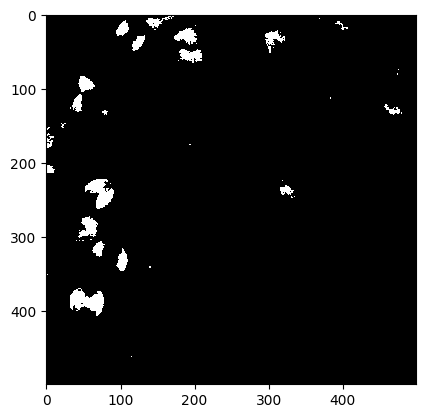

In [26]:
import pyclesperanto_prototype as cle
marker_binary = C4 > 350
## visualize the 3D images https://haesleinhuepf.github.io/BioImageAnalysisNotebooks/16_3d_image_visualization/inspecting_3d_images.html
another_slice = cle.create_2d_xy(marker_binary)
cle.copy_slice(marker_binary, another_slice, slice_index = 44)
# show result
cle.imshow(another_slice)


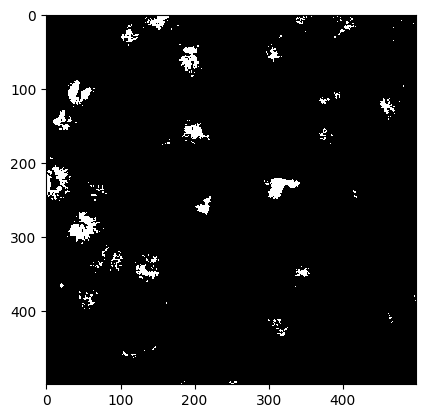

In [27]:
marker_binary = C1 > 1000
## visualize the 3D images https://haesleinhuepf.github.io/BioImageAnalysisNotebooks/16_3d_image_visualization/inspecting_3d_images.html
another_slice = cle.create_2d_xy(marker_binary)
cle.copy_slice(marker_binary, another_slice, slice_index = 35)
# show result
cle.imshow(another_slice)

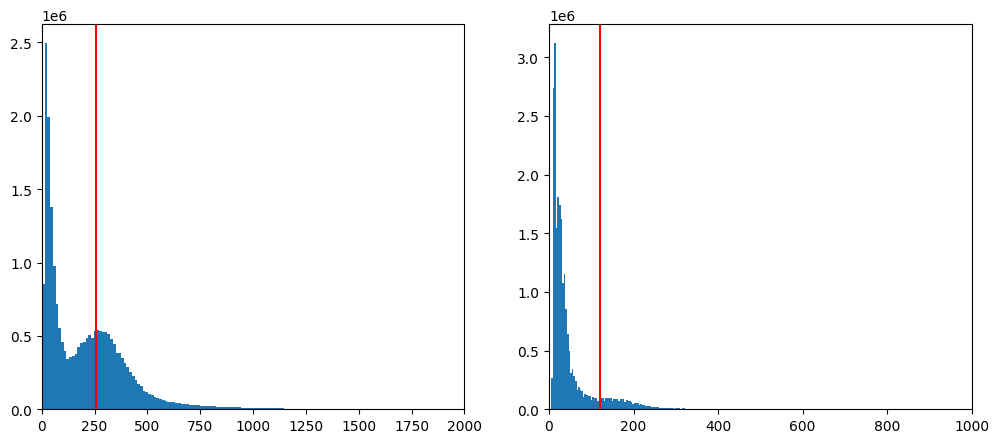

In [20]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
ax = axes.ravel()

ax[0].hist(C1.ravel(), bins=5000)
ax[0].set_xlim([0, 2000])
ax[0].axvline(cutoff_foxa2, color='r')

ax[1].hist(C4.ravel(), bins=500)
ax[1].set_xlim([0, 1000])
ax[1].axvline(cutoff_pax6, color='r')

0.217919893818234 3.9711513157894736 [ 0.56486716 38.17849431] [0.50469062 1.73843189]


0.8818781350672316 0.8200841346153847 [  257 29138] [ 98 331]


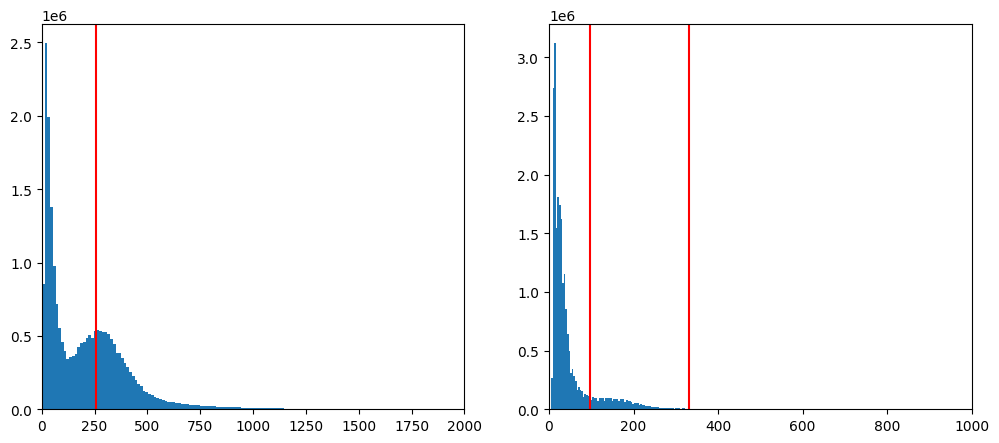

In [21]:
cutoff_foxa2 = filters.threshold_multiotsu(C1, classes=3, nbins= 512)
cutoff_pax6 = filters.threshold_multiotsu(C4, classes=3, nbins = 512)
print(cutoff_pxko, cutoff_fako, cutoff_foxa2, cutoff_pax6)

fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
ax = axes.ravel()

ax[0].hist(C1.ravel(), bins=5000)
ax[0].set_xlim([0, 2000])
ax[0].axvline(cutoff_foxa2[0], color='r')
ax[0].axvline(cutoff_foxa2[1], color='r')

ax[1].hist(C4.ravel(), bins=500)
ax[1].set_xlim([0, 1000])
ax[1].axvline(cutoff_pax6[0], color='r')
ax[1].axvline(cutoff_pax6[1], color='r')

In [131]:
cutoff_fako = filters.threshold_mean(C2)
cutoff_pxko = filters.threshold_mean(C3)
print(cutoff_fako, cutoff_pxko)

0.185891532264405 0.1334043821285734


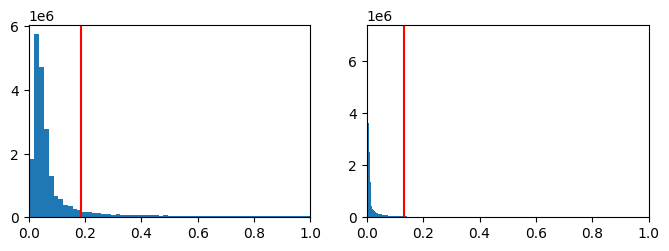

In [132]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 2.5))
ax = axes.ravel()

ax[0].hist(C2.ravel(), bins=1000)
ax[0].set_xlim([0, 1.0])
ax[0].axvline(cutoff_fako, color='r')

ax[1].hist(C3.ravel(), bins=500)
ax[1].set_xlim([0, 1.0])
ax[1].axvline(cutoff_pxko, color='r')

In [133]:
filters.threshold_multiotsu(C1, classes=3, nbins = 512)[1]

1.060446090969751

In [29]:
fileName = "241010_10x_d6-Nk22-Shh_iF-iP_RA_D4_13_01_isotropic"

mask = imread(os.path.join(imageDir, str(fileName + "_C5_CystMask.tiff"))) # mask segmeted cysts
C1 = imread(os.path.join(imageDir, str(fileName + "_C1.tif"))) # FoxA2, nuclei
C2 = imread(os.path.join(imageDir, str(fileName + "_C2.tif"))) # FoxA2-KO genotype Scarlet, nuclei
C3 = imread(os.path.join(imageDir, str(fileName + "_C3.tif"))) # Pax6-KO genotype
C4 = imread(os.path.join(imageDir, str(fileName + "_C4.tif"))) # Pax6 or other markers

C1 = C1 / np.quantile(C1, 0.95)
C2 = C2 / np.quantile(C2, 0.95)
C3 = C3 / np.quantile(C3, 0.95)
C4 = C4 / np.quantile(C4, 0.95)

cutoff_foxa2 = filters.threshold_multiotsu(C1, classes=3, nbins= 512)
cutoff_nkx = filters.threshold_multiotsu(C1, classes=4, nbins= 512)
cutoff_shh = filters.threshold_multiotsu(C4, classes=3, nbins = 256)
#cutoff_shh = filters.threshold_multiotsu(C4, classes=4, nbins = 256)

print(cutoff_foxa2, cutoff_nkx, cutoff_shh)

[ 0.56486716 38.17849431] [ 0.33963586  1.01532976 38.17849431] [0.51937801 1.76291088]


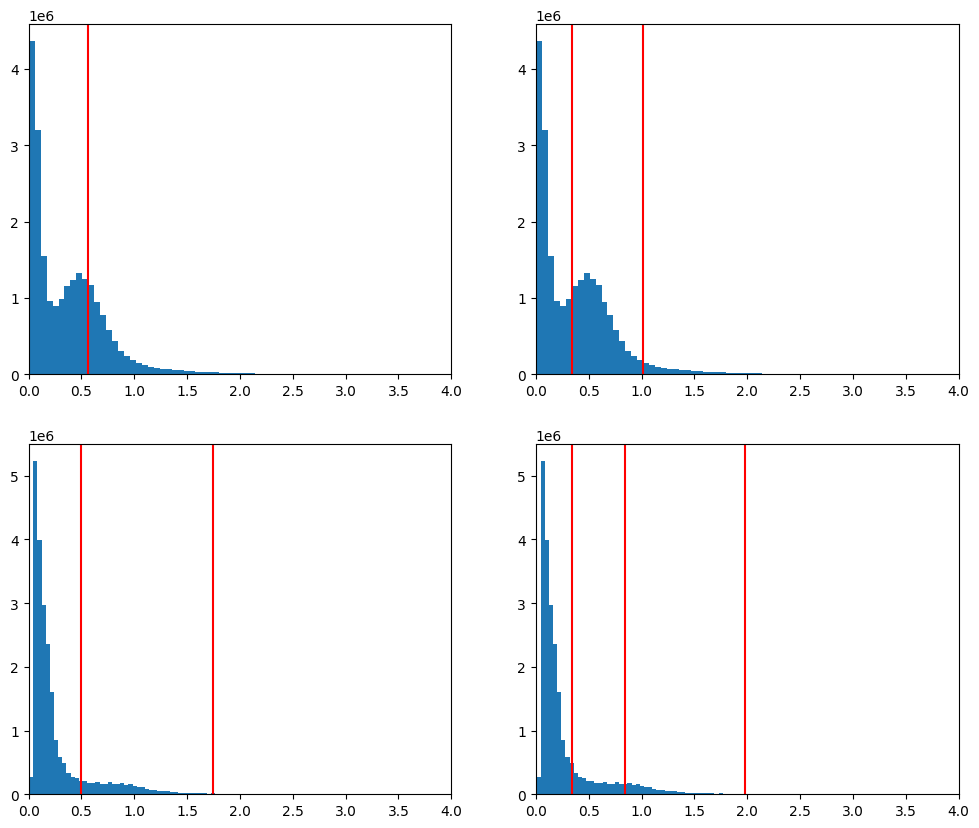

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
ax = axes.ravel()

ax[0].hist(C1.ravel(), bins=2048)
ax[0].set_xlim([0, 4])
ax[0].axvline(cutoff_foxa2[0], color='r')
ax[0].axvline(cutoff_foxa2[1], color='r')

ax[1].hist(C1.ravel(), bins=2048)
ax[1].set_xlim([0, 4.0])
ax[1].axvline(cutoff_nkx[0], color='r')
ax[1].axvline(cutoff_nkx[1], color='r')
ax[1].axvline(cutoff_nkx[2], color='r')


ax[2].hist(C4.ravel(), bins=256)
ax[2].set_xlim([0, 4.0])
ax[2].axvline(cutoff_pax6[0], color='r')
ax[2].axvline(cutoff_pax6[1], color='r')

ax[3].hist(C4.ravel(), bins=256)
ax[3].set_xlim([0, 4.0])
ax[3].axvline(cutoff_shh[0], color='r')
ax[3].axvline(cutoff_shh[1], color='r')
ax[3].axvline(cutoff_shh[2], color='r')

[0.26147988 0.58402372 1.09835038] [0.47147142 1.42526289]


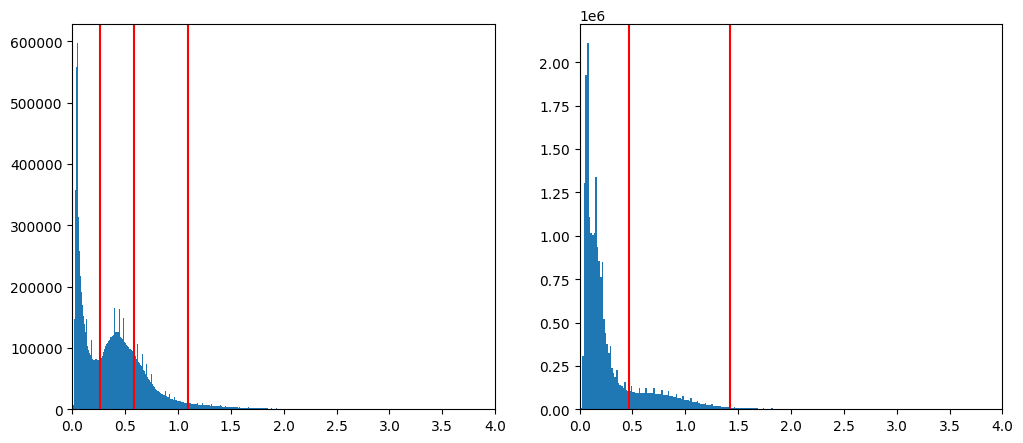

In [31]:
fileName = "241010_10x_d6-Nk22-Shh_iF-iP_RA_D4_14_01_isotropic"

mask = imread(os.path.join(imageDir, str(fileName + "_C5_CystMask.tiff"))) # mask segmeted cysts
C1 = imread(os.path.join(imageDir, str(fileName + "_C1.tif"))) # FoxA2, nuclei
C2 = imread(os.path.join(imageDir, str(fileName + "_C2.tif"))) # FoxA2-KO genotype Scarlet, nuclei
C3 = imread(os.path.join(imageDir, str(fileName + "_C3.tif"))) # Pax6-KO genotype
C4 = imread(os.path.join(imageDir, str(fileName + "_C4.tif"))) # Pax6 or other markers

C1 = C1 / np.quantile(C1, 0.95)
C2 = C2 / np.quantile(C2, 0.95)
C3 = C3 / np.quantile(C3, 0.95)
C4 = C4 / np.quantile(C4, 0.95)

cutoff_foxa2 = filters.threshold_multiotsu(C1, classes=4, nbins= 512)
cutoff_pax6 = filters.threshold_multiotsu(C4, classes=3, nbins = 256)
print(cutoff_foxa2, cutoff_pax6)

fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
ax = axes.ravel()

ax[0].hist(C1.ravel(), bins=1000)
ax[0].set_xlim([0, 4])
ax[0].axvline(cutoff_foxa2[0], color='r')
ax[0].axvline(cutoff_foxa2[1], color='r')
ax[0].axvline(cutoff_foxa2[2], color='r')

ax[1].hist(C4.ravel(), bins=500)
ax[1].set_xlim([0, 4.0])
ax[1].axvline(cutoff_pax6[0], color='r')
ax[1].axvline(cutoff_pax6[1], color='r')

[0.25157752 0.64620893 1.29735076] [0.3902394  1.00769514]


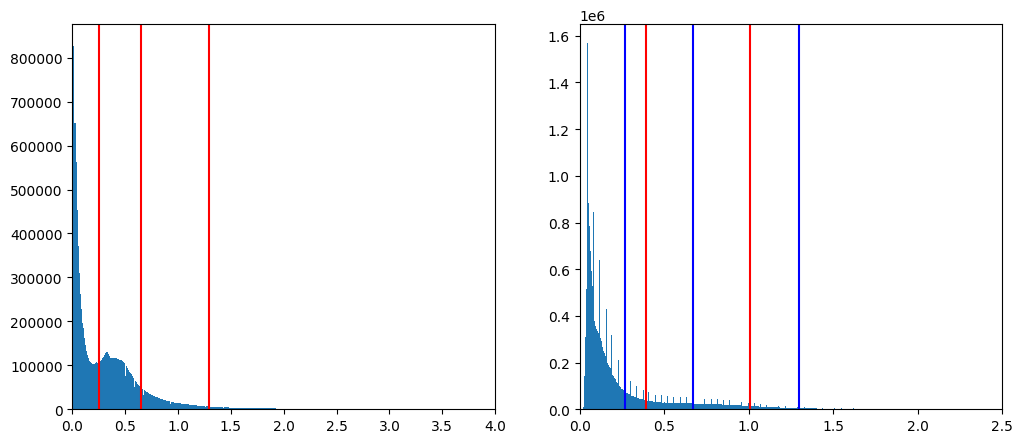

In [45]:
fileName = "241010_10x_d6-Nk22-Shh_iF-iP_RA_D4_15_01_isotropic"

mask = imread(os.path.join(imageDir, str(fileName + "_C5_CystMask.tiff"))) # mask segmeted cysts
C1 = imread(os.path.join(imageDir, str(fileName + "_C1.tif"))) # FoxA2, nuclei
C2 = imread(os.path.join(imageDir, str(fileName + "_C2.tif"))) # FoxA2-KO genotype Scarlet, nuclei
C3 = imread(os.path.join(imageDir, str(fileName + "_C3.tif"))) # Pax6-KO genotype
C4 = imread(os.path.join(imageDir, str(fileName + "_C4.tif"))) # Pax6 or other markers

C1 = C1 / np.quantile(C1, 0.95)
C2 = C2 / np.quantile(C2, 0.95)
C3 = C3 / np.quantile(C3, 0.95)
C4 = C4 / np.quantile(C4, 0.95)

C4 = C4[np.where(C4 < 2.5)]
                
cutoff_foxa2 = filters.threshold_multiotsu(C1, classes=4, nbins= 512)
cutoff_pax6 = filters.threshold_multiotsu(C4, classes=3, nbins = 512)
cutoff_shh = filters.threshold_multiotsu(C4, classes=4, nbins = 512)
print(cutoff_foxa2, cutoff_pax6, cutoff_shh)

fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
ax = axes.ravel()

ax[0].hist(C1.ravel(), bins=1000)
ax[0].set_xlim([0, 4])
ax[0].axvline(cutoff_foxa2[0], color='r')
ax[0].axvline(cutoff_foxa2[1], color='r')
ax[0].axvline(cutoff_foxa2[2], color='r')

ax[1].hist(C4.ravel(), bins=512)
ax[1].set_xlim([0, 2.5])
ax[1].axvline(cutoff_pax6[0], color='r')
ax[1].axvline(cutoff_pax6[1], color='r')
ax[1].axvline(cutoff_shh[0], color='b')
ax[1].axvline(cutoff_shh[1], color='b')
ax[1].axvline(cutoff_shh[2], color='b')

In [53]:
fileName = "241010_10x_d6-Nk22-Shh_iF-iP_RA_D4_13_01_isotropic"

mask = imread(os.path.join(imageDir, str(fileName + "_C5_CystMask.tiff"))) # mask segmeted cysts
C1 = imread(os.path.join(imageDir, str(fileName + "_C1.tif"))) # FoxA2, nuclei
C2 = imread(os.path.join(imageDir, str(fileName + "_C2.tif"))) # FoxA2-KO genotype Scarlet, nuclei
C3 = imread(os.path.join(imageDir, str(fileName + "_C3.tif"))) # Pax6-KO genotype
C4 = imread(os.path.join(imageDir, str(fileName + "_C4.tif"))) # Pax6 or other markers

In [57]:
260/np.quantile(C4, 0.95)

1.3829787234042554

[ 0.33963586  1.01532976 38.17849431] [0.48116481 1.304407  ] [0.20675075 0.5103578  0.93073679 1.64304563]


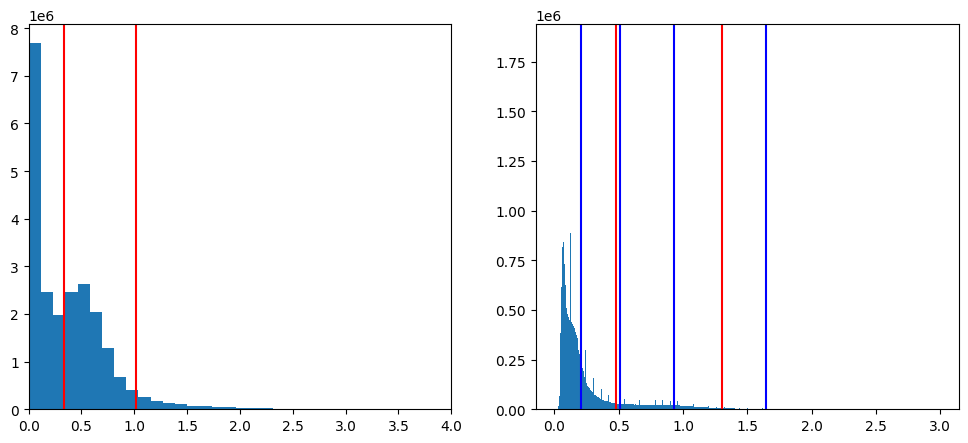

In [50]:
fileName = "241010_10x_d6-Nk22-Shh_iF-iP_RA_D4_13_01_isotropic"

mask = imread(os.path.join(imageDir, str(fileName + "_C5_CystMask.tiff"))) # mask segmeted cysts
C1 = imread(os.path.join(imageDir, str(fileName + "_C1.tif"))) # FoxA2, nuclei
C2 = imread(os.path.join(imageDir, str(fileName + "_C2.tif"))) # FoxA2-KO genotype Scarlet, nuclei
C3 = imread(os.path.join(imageDir, str(fileName + "_C3.tif"))) # Pax6-KO genotype
C4 = imread(os.path.join(imageDir, str(fileName + "_C4.tif"))) # Pax6 or other markers

C1 = C1 / np.quantile(C1, 0.95)
C2 = C2 / np.quantile(C2, 0.95)
C3 = C3 / np.quantile(C3, 0.95)
C4 = C4 / np.quantile(C4, 0.95)

C4 = C4[np.where(C4 < 3)]
                
cutoff_foxa2 = filters.threshold_multiotsu(C1, classes=4, nbins= 512)
cutoff_pax6 = filters.threshold_multiotsu(C4, classes=3, nbins = 512)
cutoff_shh = filters.threshold_multiotsu(C4, classes=4, nbins = 512)
print(cutoff_foxa2, cutoff_pax6, cutoff_shh)

fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
ax = axes.ravel()

ax[0].hist(C1.ravel(), bins=1000)
ax[0].set_xlim([0, 4])
ax[0].axvline(cutoff_foxa2[0], color='r')
ax[0].axvline(cutoff_foxa2[1], color='r')
ax[0].axvline(cutoff_foxa2[2], color='r')

ax[1].hist(C4.ravel(), bins=512)
#ax[1].set_xlim([0, 2.5])
ax[1].axvline(cutoff_pax6[0], color='r')
ax[1].axvline(cutoff_pax6[1], color='r')
ax[1].axvline(cutoff_shh[0], color='b')
ax[1].axvline(cutoff_shh[1], color='b')
ax[1].axvline(cutoff_shh[2], color='b')
ax[1].axvline(cutoff_shh[3], color='b')

500.0 188.0
[ 0.37514453  0.82291797 57.54088672] [0.44613323 1.28105261] [0.2943297  0.67967711 1.43285613]


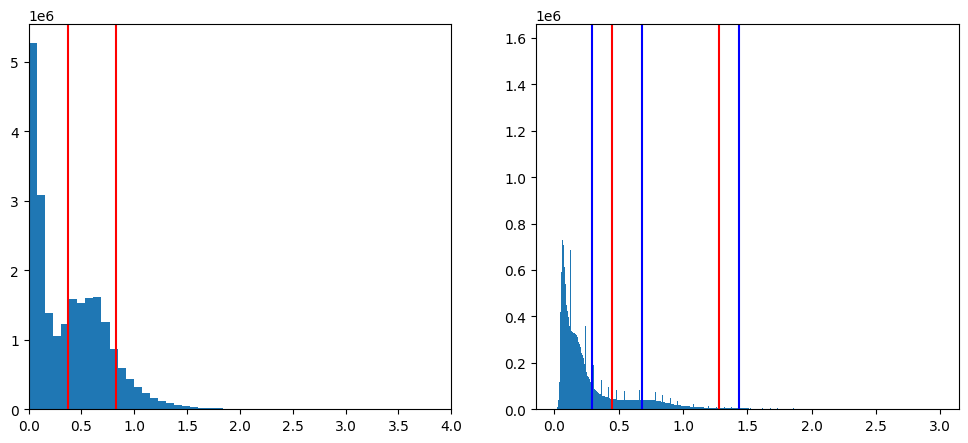

In [59]:
fileName = "241010_10x_d6-Nk22-Shh_iF-iP_dox_D7_25_01_isotropic"

mask = imread(os.path.join(imageDir, str(fileName + "_C5_CystMask.tiff"))) # mask segmeted cysts
C1 = imread(os.path.join(imageDir, str(fileName + "_C1.tif"))) # FoxA2, nuclei
C2 = imread(os.path.join(imageDir, str(fileName + "_C2.tif"))) # FoxA2-KO genotype Scarlet, nuclei
C3 = imread(os.path.join(imageDir, str(fileName + "_C3.tif"))) # Pax6-KO genotype
C4 = imread(os.path.join(imageDir, str(fileName + "_C4.tif"))) # Pax6 or other markers

print(np.quantile(C1, 0.95), np.quantile(C4, 0.95))
C1 = C1 / np.quantile(C1, 0.95)
C2 = C2 / np.quantile(C2, 0.95)
C3 = C3 / np.quantile(C3, 0.95)
C4 = C4 / np.quantile(C4, 0.95)

C4 = C4[np.where(C4 < 3)]
                
cutoff_foxa2 = filters.threshold_multiotsu(C1, classes=4, nbins= 512)
cutoff_pax6 = filters.threshold_multiotsu(C4, classes=3, nbins = 512)
cutoff_shh = filters.threshold_multiotsu(C4, classes=4, nbins = 512)
print(cutoff_foxa2, cutoff_pax6, cutoff_shh)

fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
ax = axes.ravel()

ax[0].hist(C1.ravel(), bins=1000)
ax[0].set_xlim([0, 4])
ax[0].axvline(cutoff_foxa2[0], color='r')
ax[0].axvline(cutoff_foxa2[1], color='r')
ax[0].axvline(cutoff_foxa2[2], color='r')

ax[1].hist(C4.ravel(), bins=512)
#ax[1].set_xlim([0, 2.5])
ax[1].axvline(cutoff_pax6[0], color='r')
ax[1].axvline(cutoff_pax6[1], color='r')
ax[1].axvline(cutoff_shh[0], color='b')
ax[1].axvline(cutoff_shh[1], color='b')
ax[1].axvline(cutoff_shh[2], color='b')
#ax[1].axvline(cutoff_shh[3], color='b')

In [65]:
226/188

1.202127659574468

In [29]:
C1.ravel()

array([0.01794872, 0.01923077, 0.01923077, ..., 0.02307692, 0.02051282,
       0.01794872])

[0.37514453 0.82291797] [0.48261407 1.66061856]


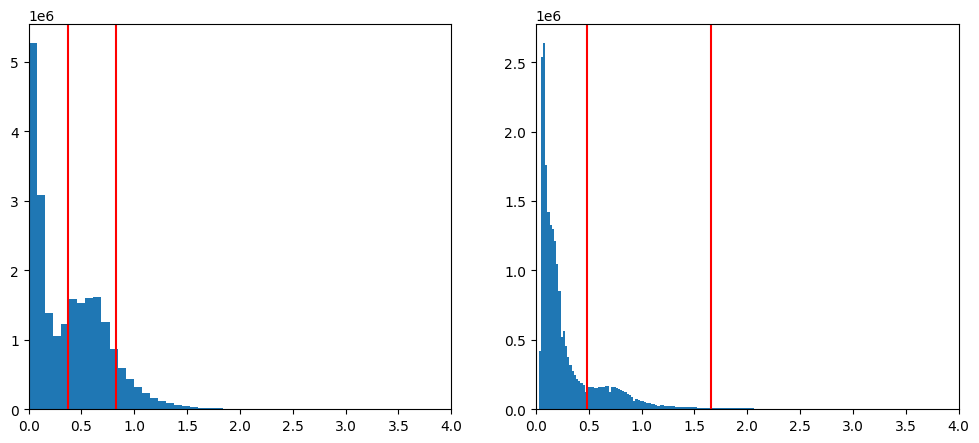

In [35]:
fileName = "241010_10x_d6-Nk22-Shh_iF-iP_dox_D7_25_01_isotropic"

mask = imread(os.path.join(imageDir, str(fileName + "_C5_CystMask.tiff"))) # mask segmeted cysts
C1 = imread(os.path.join(imageDir, str(fileName + "_C1.tif"))) # FoxA2, nuclei
C2 = imread(os.path.join(imageDir, str(fileName + "_C2.tif"))) # FoxA2-KO genotype Scarlet, nuclei
C3 = imread(os.path.join(imageDir, str(fileName + "_C3.tif"))) # Pax6-KO genotype
C4 = imread(os.path.join(imageDir, str(fileName + "_C4.tif"))) # Pax6 or other markers

C1 = C1 / np.quantile(C1, 0.95)
C2 = C2 / np.quantile(C2, 0.95)
C3 = C3 / np.quantile(C3, 0.95)
C4 = C4 / np.quantile(C4, 0.95)

cutoff_foxa2 = filters.threshold_multiotsu(C1, classes=3, nbins= 512)
cutoff_pax6 = filters.threshold_multiotsu(C4, classes=3, nbins = 512)
print(cutoff_foxa2, cutoff_pax6)

fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
ax = axes.ravel()

ax[0].hist(C1.ravel(), bins=1000)
ax[0].set_xlim([0, 4])
ax[0].axvline(cutoff_foxa2[0], color='r')
ax[0].axvline(cutoff_foxa2[1], color='r')
#ax[0].axvline(cutoff_foxa2[2], color='r')

ax[1].hist(C4.ravel(), bins=500)
ax[1].set_xlim([0, 4.0])
ax[1].axvline(cutoff_pax6[0], color='r')
ax[1].axvline(cutoff_pax6[1], color='r')

In [36]:
nkx = []
nkx = np.append(nkx, [0, 1, 2])
nkx

array([0., 1., 2.])

In [ ]:
## Test the multiotsu parameters and try to find the optimal

In [75]:
data = {"image": [], 
        "cutoff_nkx_mutliotsu3_1":[], "cutoff_nkx_mutliotsu3_2":[],
        "cutoff_nkx_mutliotsu4_1":[], "cutoff_nkx_mutliotsu4_2":[],"cutoff_nkx_mutliotsu4_3":[],
        "cutoff_shh_mutliotsu3_1":[], "cutoff_shh_mutliotsu3_2":[],
        "cutoff_shh_mutliotsu4_1":[], "cutoff_shh_mutliotsu4_2":[],"cutoff_shh_mutliotsu4_3":[]
       }
df = pd.DataFrame(data)
df

,image,cutoff_nkx_mutliotsu3_1,cutoff_nkx_mutliotsu3_2,cutoff_nkx_mutliotsu4_1,cutoff_nkx_mutliotsu4_2,cutoff_nkx_mutliotsu4_3,cutoff_shh_mutliotsu3_1,cutoff_shh_mutliotsu3_2,cutoff_shh_mutliotsu4_1,cutoff_shh_mutliotsu4_2,cutoff_shh_mutliotsu4_3


241010_10x_d6-Nk22-Shh_iF-iP_RA_D4_13_01_isotropic
[0.35000594 0.99376852] [0.27392491 0.63092052 1.227864  ] [0.47824551 1.2956491 ] [0.29141041 0.72346659 1.4941614 ]
241010_10x_d6-Nk22-Shh_iF-iP_RA_D5_19_01_isotropic
[0.35157119 1.02420033] [0.2813838  0.66156549 1.29325199] [0.44762353 1.22866901] [0.29607739 0.71574362 1.45015952]
241010_10x_d6-Nk22-Shh_iF-iP_RA_D4_16_01_isotropic
[0.29686095 0.85305662] [0.25002342 0.60715958 1.16920994] [0.44584881 1.28614082] [0.29412942 0.69093398 1.44953093]
241010_10x_d6-Nk22-Shh_iF-iP_RA_D5_17_01_isotropic
[0.33835799 0.94697648] [0.26228068 0.63096303 1.21617311] [0.45516741 1.21398437] [0.29172991 0.71199777 1.44746652]
241010_10x_d6-Nk22-Shh_iF-iP_RA_D4_15_01_isotropic
[0.30748573 0.94002779] [0.24891702 0.6354705  1.26801257] [0.4344823  1.21626878] [0.28279238 0.71452521 1.47297479]
241010_10x_d6-Nk22-Shh_iF-iP_RA_D4_14_01_isotropic
[0.32888798 0.88446071] [0.25871038 0.58620588 1.10084167] [0.42352266 1.05333605] [0.30689055 0.7151029

/tmp/ipykernel_15025/2308919349.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(ncols=2, figsize=(12, 5))


241010_10x_d6-Nk22-Shh_iF-iP_dox_D9_34_01_isotropic
[0.34024023 0.84313867] [0.28176367 0.62092773 1.09458789] [0.4363732  1.22886976] [0.30817522 0.70442351 1.46195699]
241010_10x_d6-Nk22-Shh_iF-iP_dox_D9_35_01_isotropic
[0.3265574  1.01130944] [0.27388417 0.65430197 1.25711787] [0.42409718 1.17027065] [0.30750757 0.77386599 1.52003946]
241010_10x_d6-Nk22-Shh_iF-iP_dox_D9_36_01_isotropic
[0.31330554 0.88721103] [0.26059994 0.60611446 1.11560198] [0.42299353 1.23969232] [0.28298802 0.70300454 1.47303483]


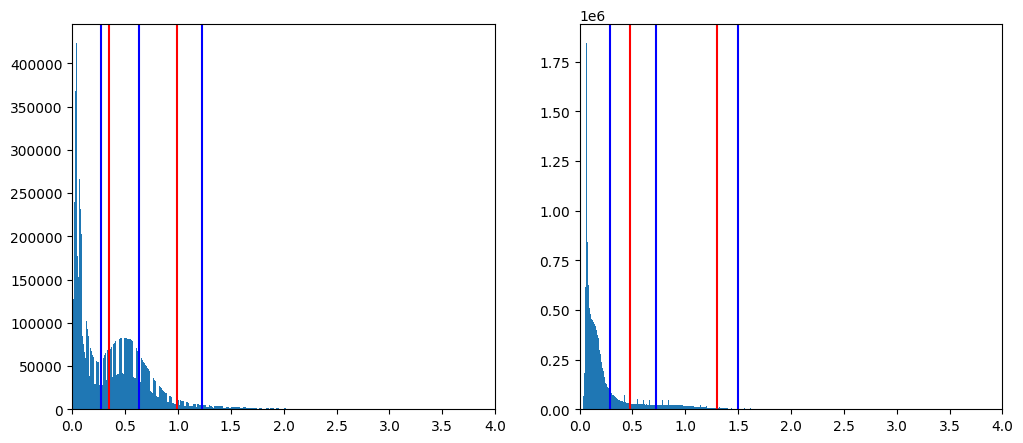

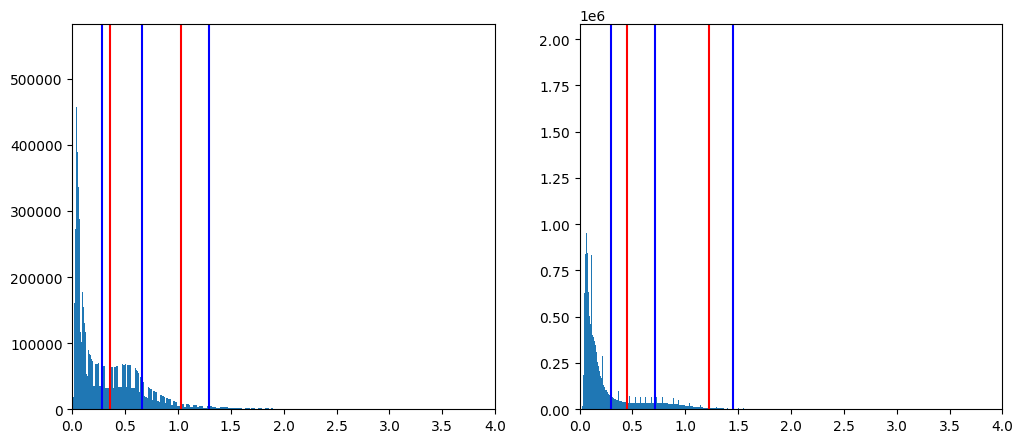

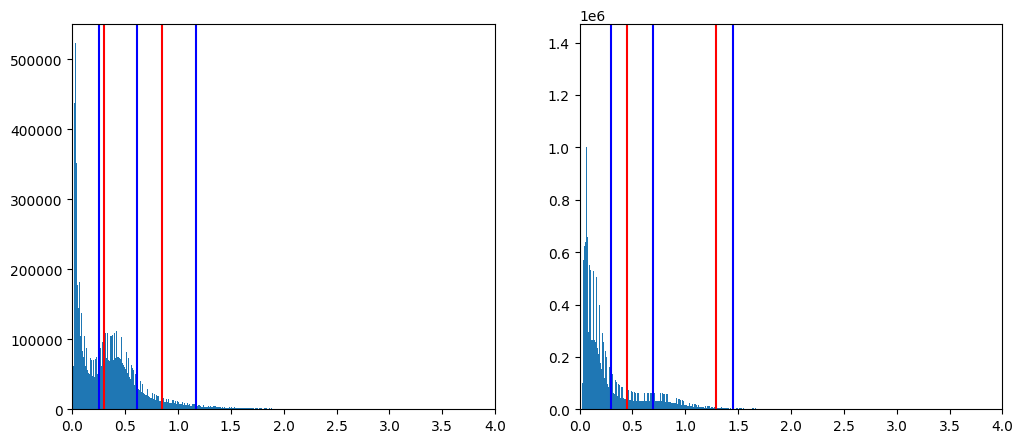

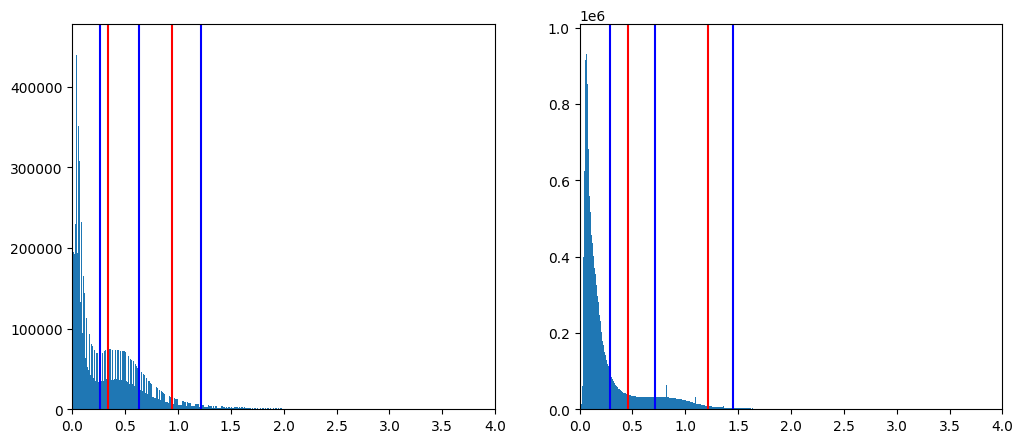

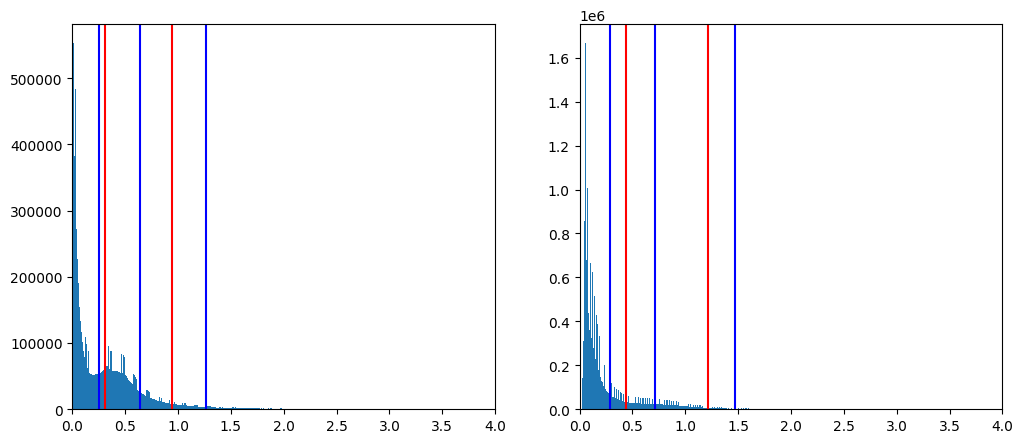

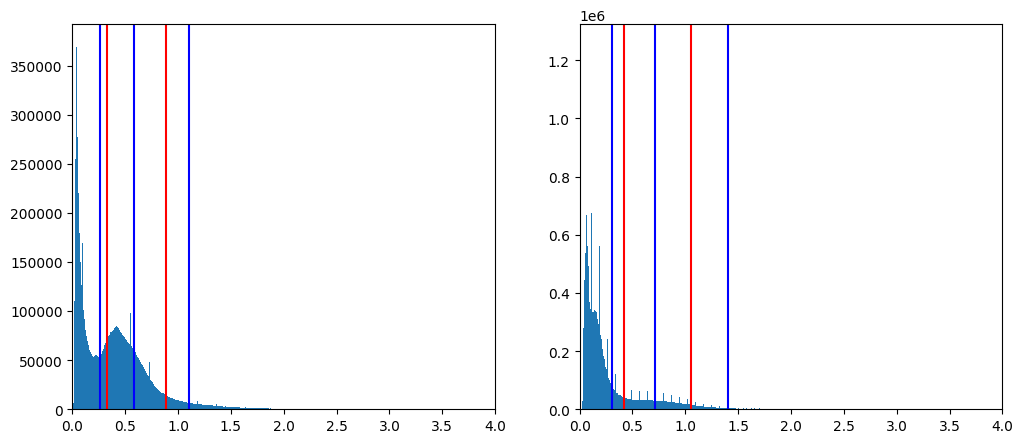

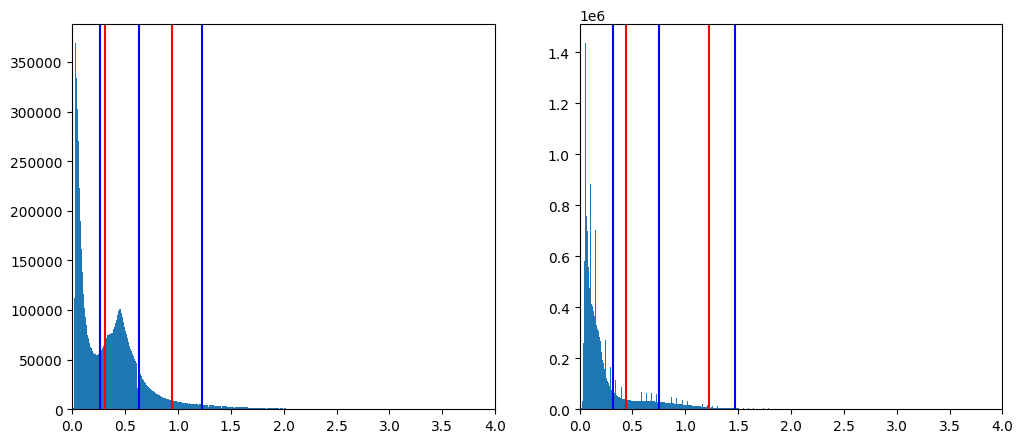

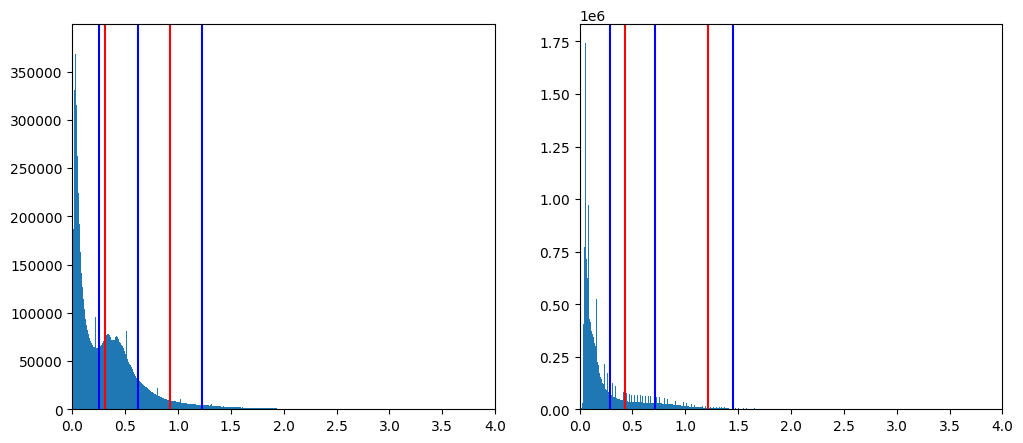

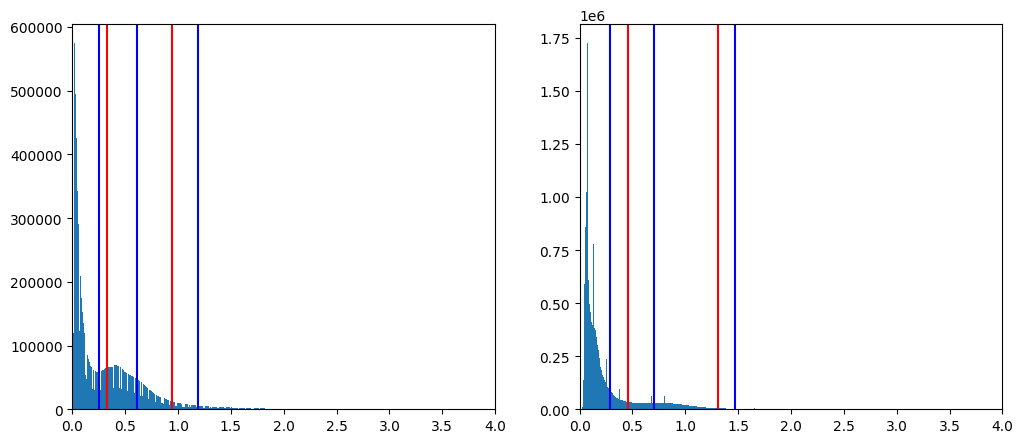

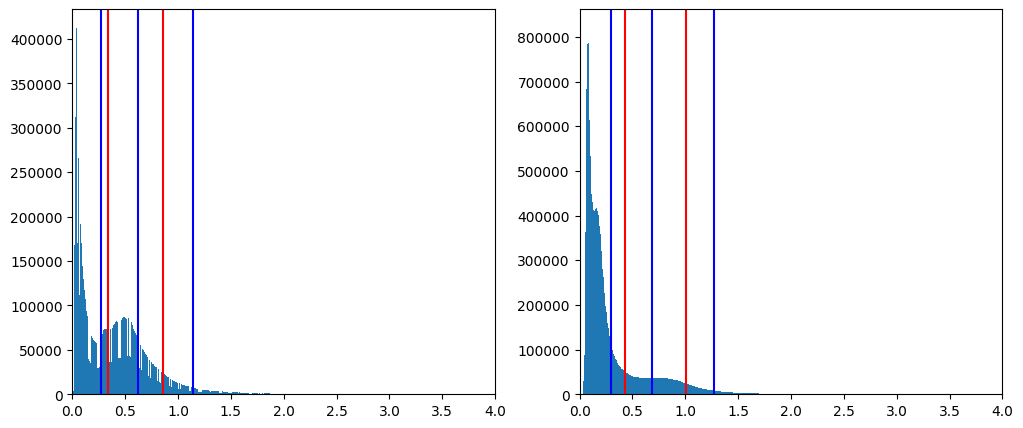

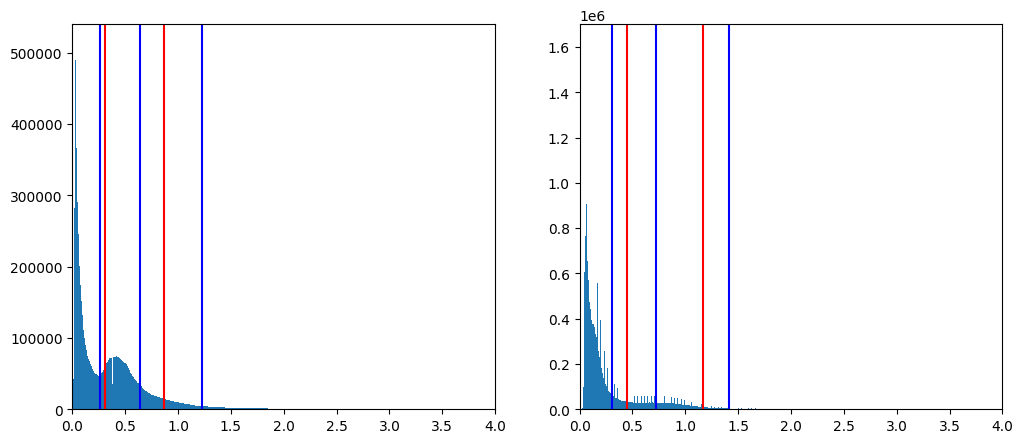

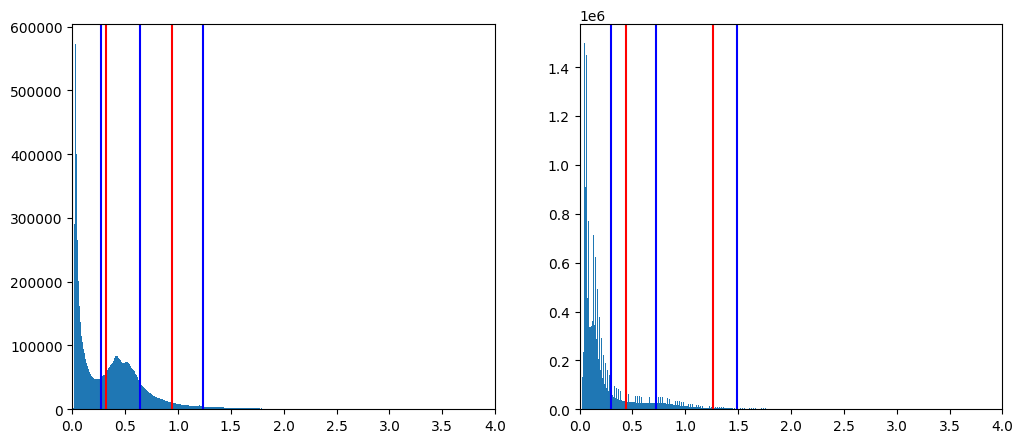

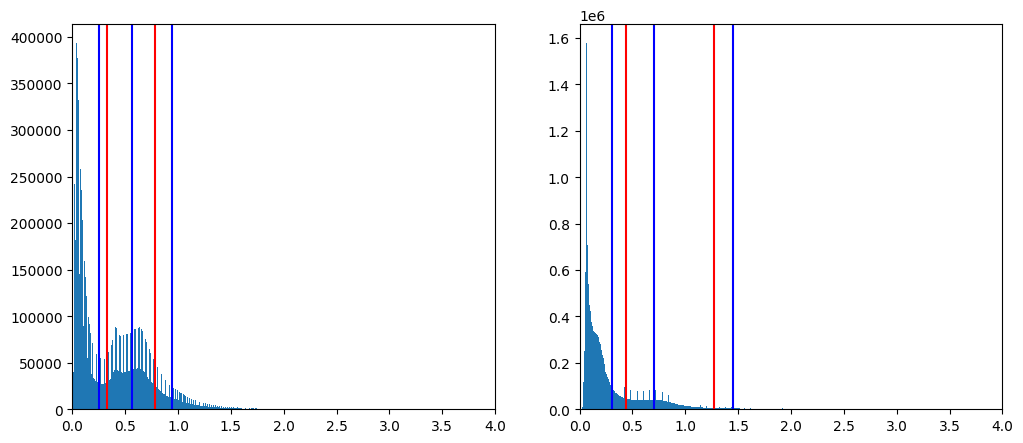

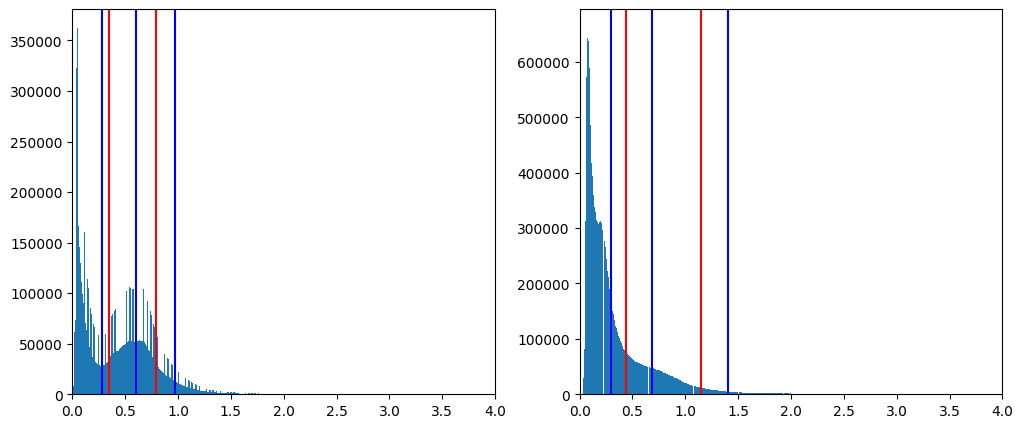

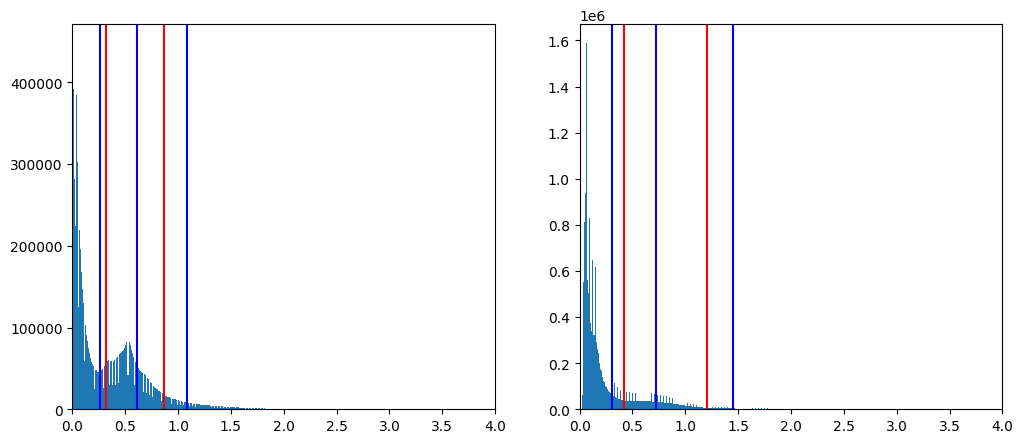

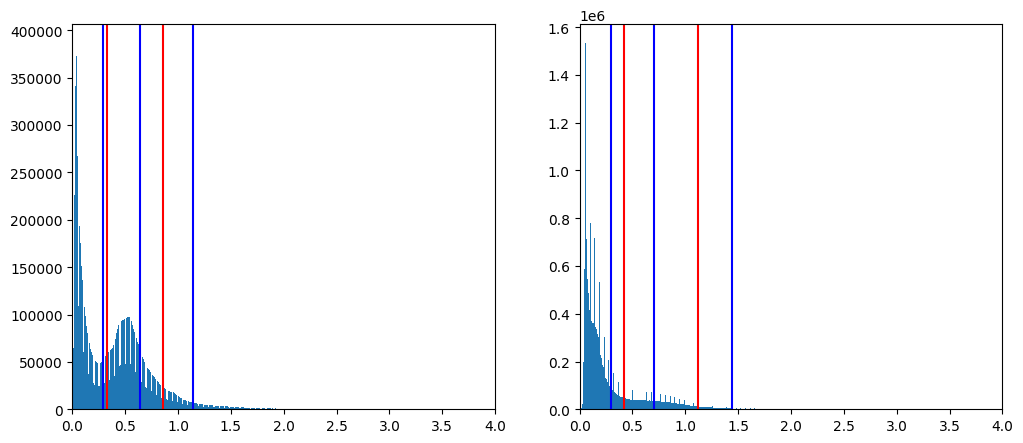

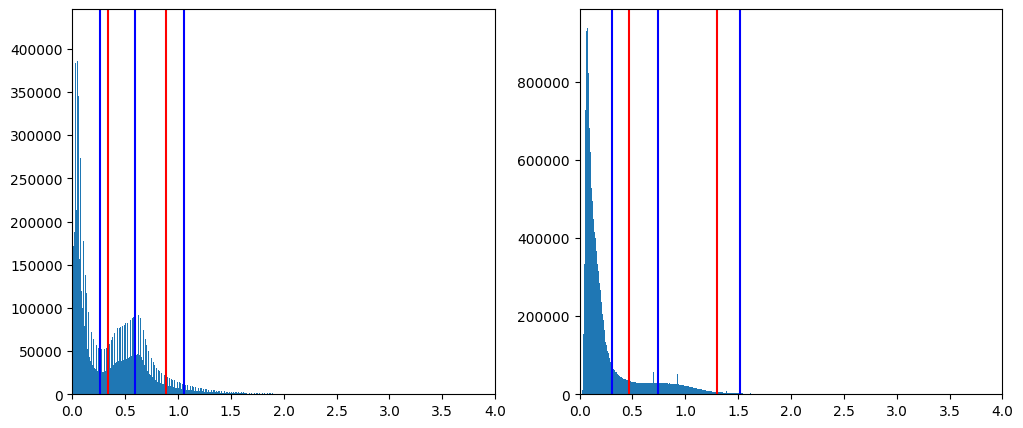

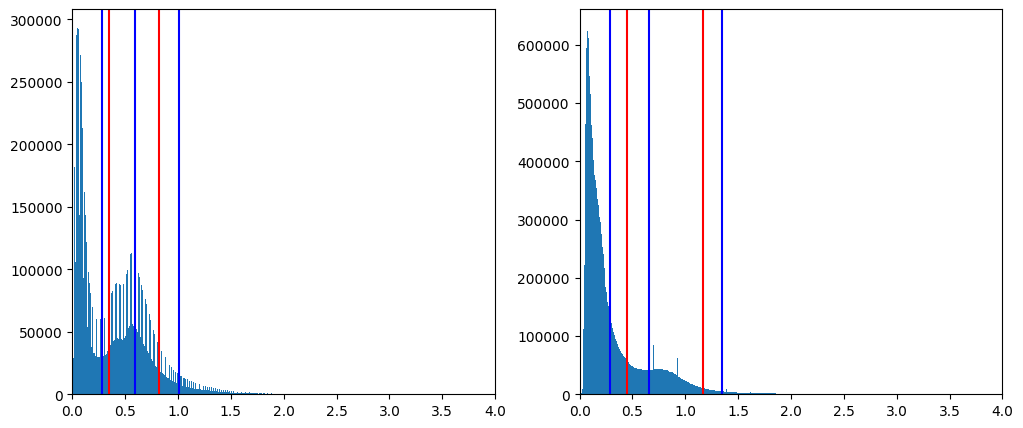

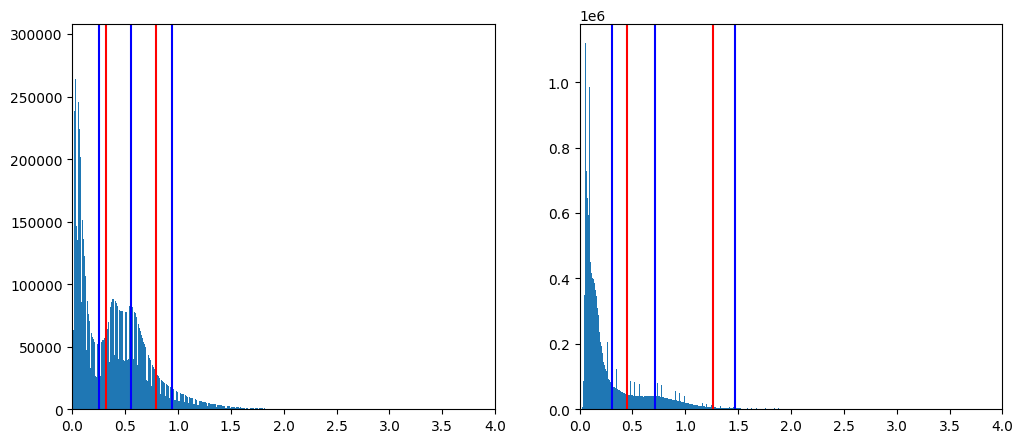

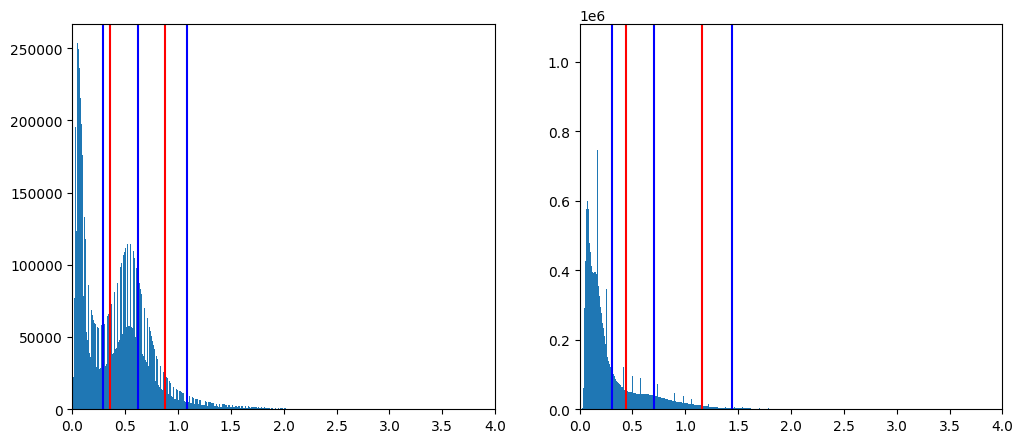

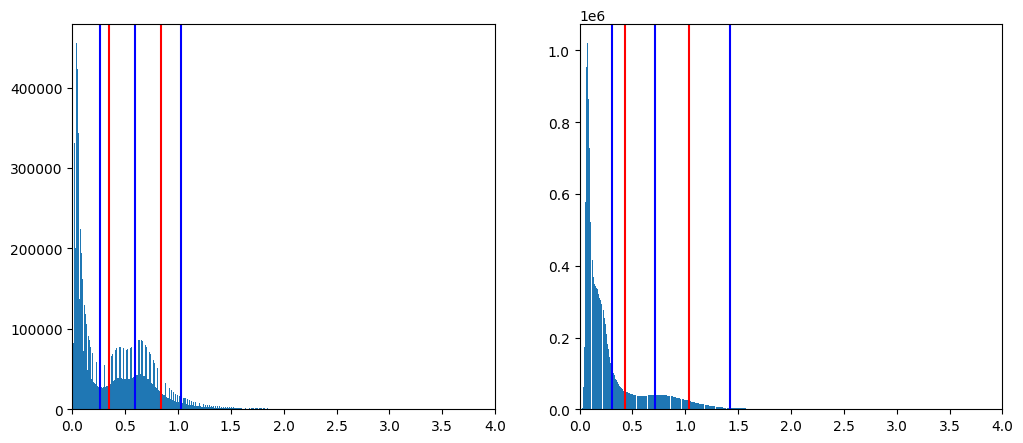

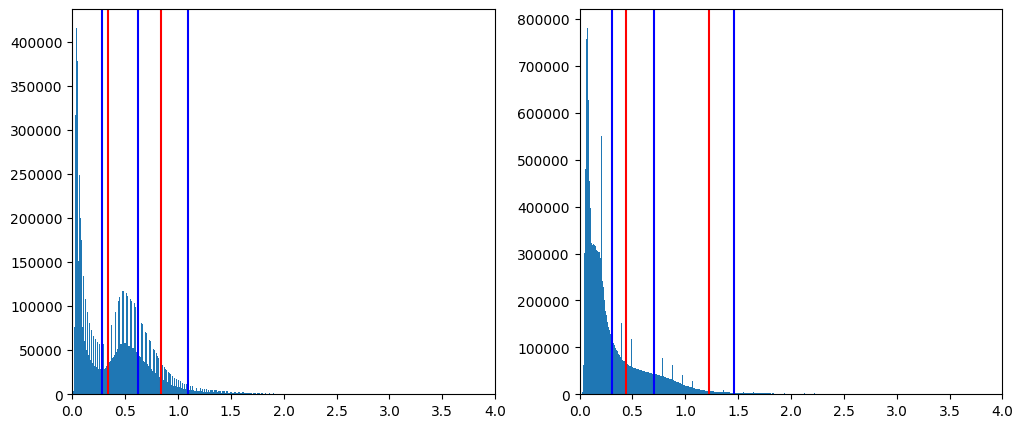

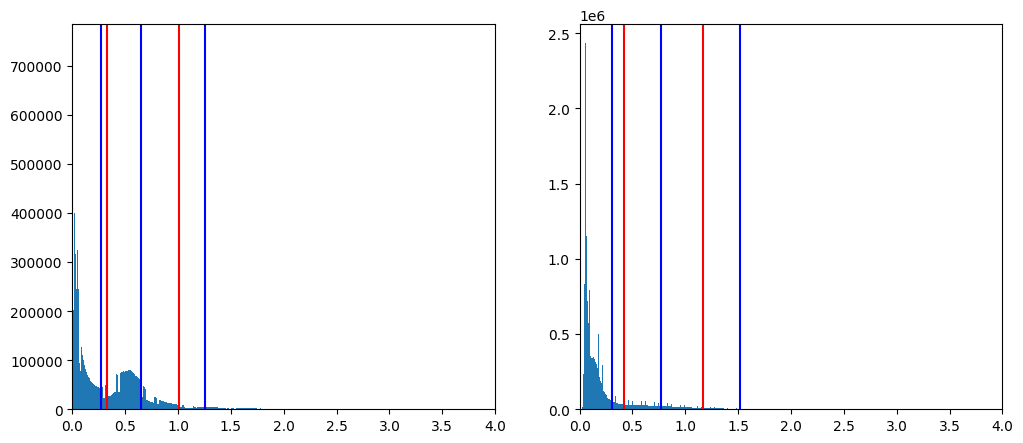

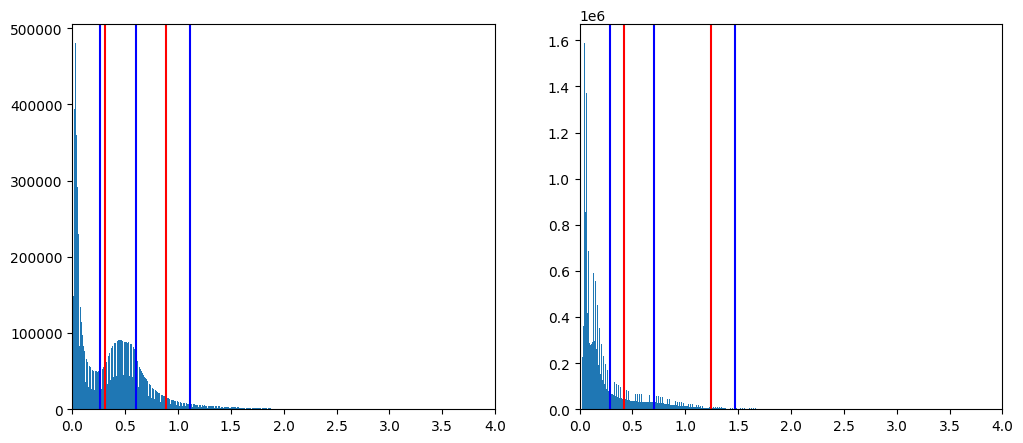

In [76]:
for nm in os.listdir(imageDir):
    if "_C5_CystMask.tiff" in nm:
        if "_noRA_" not in nm: 
            #print(nm)
            fileName = nm.replace('_C5_CystMask.tiff','')
            #files += [nm]
            print(fileName)
            #make_composite_C5(newName, ImageDir, outDir)
            
            keep = [fileName]
            
            mask = imread(os.path.join(imageDir, str(fileName + "_C5_CystMask.tiff"))) # mask segmeted cysts
            C1 = imread(os.path.join(imageDir, str(fileName + "_C1.tif"))) # Nkx22, nuclei
            C2 = imread(os.path.join(imageDir, str(fileName + "_C2.tif"))) # FoxA2-TetOn genotype Scarlet, nuclei
            C3 = imread(os.path.join(imageDir, str(fileName + "_C3.tif"))) # Pax6-TetON genotype 
            C4 = imread(os.path.join(imageDir, str(fileName + "_C4.tif"))) # Shh, nuclei
        
            C1 = C1 / np.quantile(C1, 0.95)
            C2 = C2 / np.quantile(C2, 0.95)
            C3 = C3 / np.quantile(C3, 0.95)
            C4 = C4 / np.quantile(C4, 0.95)
            
            C1 = C1[np.where(C1 < 3)]
            C4 = C4[np.where(C4 < 3)]
            
            
            #cutoff_foxa2 = filters.threshold_multiotsu(C1, classes=3, nbins= 512)
            #cutoff_pax6 = filters.threshold_multiotsu(C4, classes=4, nbins = 512)
            cutoff_foxa2 = filters.threshold_multiotsu(C1, classes=3, nbins= 512)
            cutoff_nkx = filters.threshold_multiotsu(C1, classes=4, nbins= 512)
            cutoff_pax6 = filters.threshold_multiotsu(C4, classes=3, nbins = 256)
            cutoff_shh = filters.threshold_multiotsu(C4, classes=4, nbins = 256)

            print(cutoff_foxa2, cutoff_nkx, cutoff_pax6, cutoff_shh)
            
            keep = np.append(keep, cutoff_foxa2)
            keep = np.append(keep, cutoff_nkx)
            keep = np.append(keep, cutoff_pax6)
            keep = np.append(keep, cutoff_shh)
            #nkx = np.append(nkx, C1.ravel())
            #ssh = np.append(shh, C4.ravel())
            
            fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
            ax = axes.ravel()

            ax[0].hist(C1.ravel(), bins=1024)
            ax[0].set_xlim([0, 4])
            ax[0].axvline(cutoff_foxa2[0], color='r')
            ax[0].axvline(cutoff_foxa2[1], color='r')
            ax[0].axvline(cutoff_nkx[0], color='b')
            ax[0].axvline(cutoff_nkx[1], color='b')
            ax[0].axvline(cutoff_nkx[2], color='b')

            ax[1].hist(C4.ravel(), bins=512)
            ax[1].set_xlim([0, 4.0])
            ax[1].axvline(cutoff_pax6[0], color='r')
            ax[1].axvline(cutoff_pax6[1], color='r')
            ax[1].axvline(cutoff_shh[0], color='b')
            ax[1].axvline(cutoff_shh[1], color='b')
            ax[1].axvline(cutoff_shh[2], color='b')

        
            plt.savefig(os.path.join(outDir, str(fileName + "_Nkx_Shh_histogram.pdf")))
        
            df.loc[len(df)] = keep
            

In [69]:
df

,image,cutoff_nkx_mutliotsu3_1,cutoff_nkx_mutliotsu3_2,cutoff_nkx_mutliotsu4_1,cutoff_nkx_mutliotsu4_2,cutoff_nkx_mutliotsu4_3,cutoff_shh_mutliotsu3_1,cutoff_shh_mutliotsu3_2,cutoff_shh_mutliotsu4_1,cutoff_shh_mutliotsu4_2,cutoff_shh_mutliotsu4_3
0,241010_10x_d6-Nk22-Shh_iF-iP_RA_D4_13_01_isotr...,0.5648671595483006,38.17849431182916,0.33963585923524153,1.0153297601744187,38.17849431182916,0.4782455119680851,1.295649102393617,0.2914104055851064,0.7234665890957448,1.494161402925532
1,241010_10x_d6-Nk22-Shh_iF-iP_RA_D5_19_01_isotr...,0.35585450956405695,1.060446090969751,0.28224046374555156,0.6818595696174377,1.3654185665035588,0.44762352748691103,1.2286690117801045,0.29607738874345546,0.7157436191099477,1.4501595222513086
2,241010_10x_d6-Nk22-Shh_iF-iP_RA_D4_16_01_isotr...,0.29772393023081534,0.8582778308603116,0.24898011278477214,0.6064347740557553,1.1751126442595923,0.44584880891393447,1.2861408171106556,0.294129418545082,0.6909339779713115,1.4495309298155736
3,241010_10x_d6-Nk22-Shh_iF-iP_RA_D5_17_01_isotr...,0.41380972125232773,1.0729257594273744,0.2490307117085661,0.5785887307960894,1.237704768971136,0.4551674107142857,1.213984375,0.29172991071428567,0.7119977678571427,1.4474665178571429
4,241010_10x_d6-Nk22-Shh_iF-iP_RA_D4_15_01_isotr...,0.3107722355769231,0.9520482772435896,0.2515775240384615,0.6462089342948718,1.2973507612179487,0.4344822961373391,1.2162687768240343,0.28279238197424894,0.7145252145922746,1.4729747854077253
5,241010_10x_d6-Nk22-Shh_iF-iP_RA_D4_14_01_isotr...,0.33121908723021576,0.889132756294964,0.2614798785971223,0.5840237185251799,1.0983503821942446,0.42352265995260663,1.053336048578199,0.30689055094786727,0.715102932464455,1.4032323755924172
6,241010_10x_d6-Nk22-Shh_iF-iP_RA_D5_18_01_isotr...,0.6186435722305389,76.06279823166167,0.4435991298652694,1.143776899326347,76.06279823166167,0.44313557942708326,1.2255655924479165,0.31467692057291663,0.74676513671875,1.4708048502604165
7,241010_10x_d6-Nk22-Shh_iF-iP_RA_D5_20_01_isotr...,0.30697828864777627,0.9481188912302727,0.2568891790710187,0.637566411854376,1.2887248363522241,0.43113839285714284,1.2138020833333334,0.2909598214285714,0.7114955357142858,1.4474330357142857
8,241010_10x_d6-Nk22-Shh_iF-iP_RA_D6_21_01_isotr...,0.540491937183811,43.64493966062395,0.32496969856661045,0.9715364144182124,43.64493966062395,0.4594103224734043,1.310328706781915,0.2845640791223405,0.7041950631648937,1.4735185339095747
9,241010_10x_d6-Nk22-Shh_iF-iP_RA_D6_22_01_isotr...,0.30599068866723256,0.8218146487691003,0.30599068866723256,0.6498733287351444,1.1656972888370118,0.4252786915204678,1.0077896564327484,0.2971262792397661,0.6815835160818713,1.2757447002923976


In [70]:
df.to_csv(os.path.join(outDir, "image_gloablThresholds_multiotsu_Nkx_ShhfilteringLargeValues.csv"), index=True, header=True)

In [ ]:
cutoff_foxa2 = filters.threshold_multiotsu(image= None, hist = nkx, classes=3)
cutoff_pax6 = filters.threshold_multiotsu(image = None, hist = shh, classes=4)

In [ ]:
print(cutoff_foxa2, cutoff_pax6)

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
ax = axes.ravel()

ax[0].hist(nkx, bins=1000)
ax[0].set_xlim([0, 4])
ax[0].axvline(cutoff_foxa2[0], color='r')
ax[0].axvline(cutoff_foxa2[1], color='r')
#ax[0].axvline(cutoff_foxa2[2], color='r')
ax[1].hist(shh, bins=500)
ax[1].set_xlim([0, 4.0])
ax[1].axvline(cutoff_pax6[0], color='r')
ax[1].axvline(cutoff_pax6[1], color='r')
ax[1].axvline(cutoff_pax6[2], color='r')

In [16]:
imageDir = "../images_data/d3-4-6_10x_TetOnF_TetOnP_chim_fulldataset/d6_stain-DV-patterning"
outDir = "../images_data/results/TetOnF_TetOnP_chim_d6_genotype_stainDVpatterning"

if not os.path.exists(outDir):
    os.mkdir(outDir)
#os.path.exists(outDir)

In [17]:
#### test global threshold method (not working well) and manual thrshold 

In [18]:
import pandas as pd
from skimage import measure
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from skimage import measure
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
import pyclesperanto_prototype as cle
from skimage import filters
from skimage.filters import try_all_threshold
import napari_simpleitk_image_processing as nsitk

from skimage import measure

data = {"image": [], "cyst_index": [], "cyst_size": [], 
        "cutoff_fxko_global_otsu": [],  "cutoff_pxko_global_otsu": [], "nb_fxko_global_otsu": [], "nb_pxko_global_otsu": [],
        "cutoff_fxko_cyst_otsu": [],  "cutoff_pxko_cyst_otsu": [], "nb_fxko_cyst_otsu": [], "nb_pxko_cyst_otsu": [],
        "cutoff_nkx_global_multiotsu": [], "cutoff_shh_global_multiotsu": [], "nb_nkx_global_multiotsu": [], "nb_shh_global_multiotsu": [],
        "cutoff_nkx_global_multiotsu_2": [], "cutoff_shh_global_multiotsu_2": [], "nb_nkx_global_multiotsu_2": [], "nb_shh_global_multiotsu_2": [], 
        "cutoff_nkx_cyst_otsu": [], "cutoff_shh_cyst_otsu": [], "nb_nkx_cyst_otsu": [], "nb_shh_cyst_otsu": [], 
        "nb_total_genotype":[],  "nb_total_fxko":[],  "nb_total_pxko":[],
        "nb_nkx_fxko": [], "nb_shh_fxko": [],
        "nb_nkx_pxko": [], "nb_shh_pxko": []
        
       }

df = pd.DataFrame(data)
df


for nm in os.listdir(imageDir):
    if "_C5_CystMask.tiff" in nm:
        #print(nm)
        fileName = nm.replace('_C5_CystMask.tiff','')
        #files += [nm]
        print(fileName)
        #make_composite_C5(newName, ImageDir, outDir)
        
        mask = imread(os.path.join(imageDir, str(fileName + "_C5_CystMask.tiff"))) # mask segmeted cysts
        C1 = imread(os.path.join(imageDir, str(fileName + "_C1.tif"))) # Nkx22, nuclei
        C2 = imread(os.path.join(imageDir, str(fileName + "_C2.tif"))) # FoxA2-TetOn genotype Scarlet, nuclei
        C3 = imread(os.path.join(imageDir, str(fileName + "_C3.tif"))) # Pax6-TetON genotype 
        C4 = imread(os.path.join(imageDir, str(fileName + "_C4.tif"))) # Shh, nuclei
        
        #C1 = C1 / np.quantile(C1, 0.95)
        C2 = C2 / np.quantile(C2, 0.95)
        C3 = C3 / np.quantile(C3, 0.95)
        #C4 = C4 / np.quantile(C4, 0.95)
        
        labels_mask, nb_cyst = measure.label(mask, return_num = True)
        
        cutoff_fako_global_otsu = filters.threshold_otsu(C2)
        cutoff_pxko_global_otsu = filters.threshold_otsu(C3)
        
        C1_filtered = C1[np.where(C1 < 3000)]
        C4_filtered = C4[np.where(C4 < 1500)]
        #cutoff_foxa2_global_multiotsu = filters.threshold_multiotsu(C1_filtered, classes=3, nbins= 512)[1]
        #cutoff_pax6_global_multiotsu = filters.threshold_multiotsu(C4_filtered, classes=3, nbins = 256)[1]
        
        cutoff_foxa2_global_multiotsu = 1000
        cutoff_pax6_global_multiotsu = 225
        
        cutoff_foxa2_global_multiotsu_2 = filters.threshold_multiotsu(C1_filtered, classes=3, nbins= 512)[1]
        cutoff_pax6_global_multiotsu_2 = filters.threshold_multiotsu(C4_filtered, classes=3, nbins = 256)[1]
        
        
        for i in range(nb_cyst+1):
            if i > 0:
                cyst_index = np.where(labels_mask == i)
                
                keep = [fileName, i, cyst_index[0].size]
                
                genotype_fako = C2[cyst_index]
                genotype_pxko = C3[cyst_index]
                foxa2 = C1[cyst_index]
                pax6 = C4[cyst_index]
                
                # counting genotype using the global thresholds
                index_fako_global = np.where((genotype_fako > cutoff_fako_global_otsu) & (genotype_pxko < cutoff_pxko_global_otsu))
                index_pxko_global = np.where((genotype_pxko > cutoff_pxko_global_otsu) & (genotype_fako < cutoff_fako_global_otsu))
                keep = keep + [cutoff_fako_global_otsu, cutoff_pxko_global_otsu, index_fako_global[0].size, index_pxko_global[0].size ]
                
                # counting genotype using the cyst threshold
                ## calculate the cyst-based thresholds
                #cutoff_fako = threshold_otsu(genotype_fako)
                #cutoff_pxko = threshold_otsu(genotype_pxko)
                cutoff_fako = filters.threshold_otsu(genotype_fako)
                cutoff_pxko = filters.threshold_otsu(genotype_pxko)
                
                index_fako = np.where((genotype_fako > cutoff_fako) & (genotype_pxko < cutoff_pxko))
                index_pxko = np.where((genotype_pxko > cutoff_pxko) & (genotype_fako < cutoff_fako))
                keep = keep + [cutoff_fako, cutoff_pxko, index_fako[0].size, index_pxko[0].size]
                
                ## counting Nkx22 and Shh (that do not exclude each other) using gloabl threshold
                index_foxa2_global = np.where((foxa2 > cutoff_foxa2_global_multiotsu)) # Nkx22 
                index_pax6_global = np.where((pax6 > cutoff_pax6_global_multiotsu))## Shh
                keep = keep + [cutoff_foxa2_global_multiotsu, cutoff_pax6_global_multiotsu, index_foxa2_global[0].size, index_pax6_global[0].size ]
                
                index_foxa2_global_2 = np.where((foxa2 > cutoff_foxa2_global_multiotsu_2)) # Nkx22 
                index_pax6_global_2 = np.where((pax6 > cutoff_pax6_global_multiotsu_2))## Shh
                keep = keep + [cutoff_foxa2_global_multiotsu_2, cutoff_pax6_global_multiotsu_2, index_foxa2_global_2[0].size, index_pax6_global_2[0].size ]
                
                cutoff_foxa2 = filters.threshold_otsu(foxa2)
                cutoff_pax6 = filters.threshold_otsu(pax6) 
                
                index_foxa2_cyst = np.where(foxa2 > cutoff_foxa2)
                index_pax6_cyst = np.where(pax6 > cutoff_pax6)
                keep = keep + [cutoff_foxa2, cutoff_pax6, index_foxa2_cyst[0].size, index_pax6_cyst[0].size ]
                
                # count the foxa2+ and pax6+ voxels in the whole cyst but avoid cross-channel comparison
                #index_fako_cyst = np.where((genotype_fako > cutoff_fako) & (genotype_fako > genotype_pxko))
                #index_pxko_cyst = np.where((genotype_pxko > cutoff_pxko) & (genotype_fako < genotype_pxko))
                index_fako_cyst = np.where((genotype_fako > cutoff_fako) & (genotype_pxko < cutoff_pxko))
                index_pxko_cyst = np.where((genotype_pxko > cutoff_pxko) & (genotype_fako < cutoff_fako))
                
                #genotype_total = index_fako_cyst[0].size + index_pxko_cyst[0].size
                genotype_total = index_fako_cyst[0].size + index_pxko_cyst[0].size
                
                foxa2_fako = foxa2[index_fako_cyst]
                pax6_fako = pax6[index_fako_cyst]
                foxa2_pxko = foxa2[index_pxko_cyst]
                pax6_pxko = pax6[index_pxko_cyst]
                
                index_foxa2_fako = np.where(foxa2_fako > cutoff_foxa2_global_multiotsu)
                index_pax6_fako = np.where(pax6_fako > cutoff_pax6_global_multiotsu)
                
                index_foxa2_pxko = np.where(foxa2_pxko > cutoff_foxa2_global_multiotsu)
                index_pax6_pxko = np.where(pax6_pxko > cutoff_pax6_global_multiotsu)
                
                #print(index_foxa2_fako[0].size, index_pax6_pxko[0].size)
                keep = keep + [ genotype_total, index_fako_cyst[0].size, index_pxko_cyst[0].size,
                                        index_foxa2_fako[0].size,  index_pax6_fako[0].size,  
                                        index_foxa2_pxko[0].size,  index_pax6_pxko[0].size
                              ]
                
                
                if (cyst_index[0].size) > 1000:
                    df.loc[len(df)] = keep
                    

241010_10x_d6-Nk22-Shh_iF-iP_RA_D4_13_01_isotropic
241010_10x_d6-Nk22-Shh_iF-iP_RA_D5_19_01_isotropic
241010_10x_d6-Nk22-Shh_iF-iP_RA_D4_16_01_isotropic
241010_10x_d6-Nk22-Shh_iF-iP_RA_D5_17_01_isotropic
241010_10x_d6-Nk22-Shh_iF-iP_RA_D4_15_01_isotropic
241010_10x_d6-Nk22-Shh_iF-iP_RA_D4_14_01_isotropic
241010_10x_d6-Nk22-Shh_iF-iP_RA_D5_18_01_isotropic
241010_10x_d6-Nk22-Shh_iF-iP_RA_D5_20_01_isotropic
241010_10x_d6-Nk22-Shh_iF-iP_RA_D6_21_01_isotropic
241010_10x_d6-Nk22-Shh_iF-iP_RA_D6_22_01_isotropic
241010_10x_d6-Nk22-Shh_iF-iP_RA_D6_23_01_isotropic
241010_10x_d6-Nk22-Shh_iF-iP_RA_D6_24_01_isotropic
241010_10x_d6-Nk22-Shh_iF-iP_dox_D7_25_01_isotropic
241010_10x_d6-Nk22-Shh_iF-iP_dox_D7_26_01_isotropic
241010_10x_d6-Nk22-Shh_iF-iP_dox_D7_27_01_isotropic
241010_10x_d6-Nk22-Shh_iF-iP_dox_D7_28_01_isotropic
241010_10x_d6-Nk22-Shh_iF-iP_dox_D8_29_01_isotropic
241010_10x_d6-Nk22-Shh_iF-iP_dox_D8_30_01_isotropic
241010_10x_d6-Nk22-Shh_iF-iP_dox_D8_31_01_isotropic
241010_10x_d6-Nk22-Shh_i

In [19]:
df.to_csv(os.path.join(outDir, "cyst_size_genotype_cyst_Nkx22_Shh_image_manualThresholds_shh225_v4.csv"), index=True, header=True)

In [ ]:
#### test many global and cyst-based thresholding methods

In [71]:
import pandas as pd
from skimage import measure
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from skimage import measure
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
import pyclesperanto_prototype as cle
from skimage import filters
from skimage.filters import try_all_threshold
import napari_simpleitk_image_processing as nsitk

from skimage import measure

data = {"image": [], "cyst_index": [], "cyst_size": [], 
        
        "cutoff_fxko_global_otsu": [],  "cutoff_pxko_global_otsu": [], "nb_fxko_global_otsu": [], "nb_pxko_global_otsu": [],
        "cutoff_fxko_global_mean": [],  "cutoff_pxko_global_mean": [], "nb_fxko_global_mean": [], "nb_pxko_global_mean": [],
        "cutoff_fxko_global_li": [],  "cutoff_pxko_global_li": [], "nb_fxko_global_li": [], "nb_pxko_global_li": [],
        "cutoff_fxko_global_yen": [],  "cutoff_pxko_global_yen": [], "nb_fxko_global_yen": [], "nb_pxko_global_yen": [],
        "cutoff_fxko_global_isodata": [],  "cutoff_pxko_global_isodata": [], "nb_fxko_global_isodata": [], "nb_pxko_global_isodata": [],
        
        "cutoff_fxko_cyst_otsu": [],  "cutoff_pxko_cyst_otsu": [], "nb_fxko_cyst_otsu": [], "nb_pxko_cyst_otsu": [],
        "cutoff_fxko_cyst_mean": [],  "cutoff_pxko_cyst_mean": [], "nb_fxko_cyst_mean": [], "nb_pxko_cyst_mean": [],
        "cutoff_fxko_cyst_li": [],  "cutoff_pxko_cyst_li": [], "nb_fxko_cyst_li": [], "nb_pxko_cyst_li": [],
        "cutoff_fxko_cyst_yen": [],  "cutoff_pxko_cyst_yen": [], "nb_fxko_cyst_yen": [], "nb_pxko_cyst_yen": [],
        "cutoff_fxko_cyst_isodata": [],  "cutoff_pxko_cyst_isodata": [], "nb_fxko_cyst_isodata": [], "nb_pxko_cyst_isodata": [],
        
        "cutoff_nkx_global_multiotsu": [], "cutoff_shh_global_multiotsu": [], "nb_nkx_global_multiotsu": [], "nb_shh_global_multiotsu": [],
        "cutoff_nkx_global_otsu": [], "cutoff_shh_global_otsu": [], "nb_nkx_global_otsu": [], "nb_shh_global_otsu": [],
        "cutoff_nkx_global_mean": [], "cutoff_shh_global_mean": [], "nb_nkx_global_mean": [], "nb_shh_global_mean": [],
        "cutoff_nkx_global_li": [], "cutoff_shh_global_li": [], "nb_nkx_global_li": [], "nb_shh_global_li": [],
        "cutoff_nkx_global_yen": [], "cutoff_shh_global_yen": [], "nb_nkx_global_yen": [], "nb_shh_global_yen": [],
        "cutoff_nkx_global_isodata": [], "cutoff_shh_global_isodata": [], "nb_nkx_global_isodata": [], "nb_shh_global_isodata": [],
        
        "cutoff_nkx_cyst_otsu": [], "cutoff_shh_cyst_otsu": [], "nb_nkx_cyst_otsu": [], "nb_shh_cyst_otsu": [],
        "cutoff_nkx_cyst_mean": [], "cutoff_shh_cyst_mean": [], "nb_nkx_cyst_mean": [], "nb_shh_cyst_mean": [],
        "cutoff_nkx_cyst_li": [], "cutoff_shh_cyst_li": [], "nb_nkx_cyst_li": [], "nb_shh_cyst_li": [],
        "cutoff_nkx_cyst_yen": [], "cutoff_shh_cyst_yen": [], "nb_nkx_cyst_yen": [], "nb_shh_cyst_yen": [],
        "cutoff_nkx_cyst_isodata": [], "cutoff_shh_cyst_isodata": [], "nb_nkx_cyst_isodata": [], "nb_shh_cyst_isodata": [],
        
        
        
        #"genotype_total": [], 
        #"fxko_nb_foxa2": [], "fxko_nb_pax6": [],  "pxko_nb_foxa2": [], "pxko_nb_pax6": []
        
       }
df = pd.DataFrame(data)
df

,image,cyst_index,cyst_size,cutoff_fxko_global_otsu,cutoff_pxko_global_otsu,nb_fxko_global_otsu,nb_pxko_global_otsu,cutoff_fxko_global_mean,cutoff_pxko_global_mean,nb_fxko_global_mean,...,nb_nkx_cyst_li,nb_shh_cyst_li,cutoff_nkx_cyst_yen,cutoff_shh_cyst_yen,nb_nkx_cyst_yen,nb_shh_cyst_yen,cutoff_nkx_cyst_isodata,cutoff_shh_cyst_isodata,nb_nkx_cyst_isodata,nb_shh_cyst_isodata


In [72]:
for nm in os.listdir(imageDir):
    if "_C5_CystMask.tiff" in nm:
        #print(nm)
        fileName = nm.replace('_C5_CystMask.tiff','')
        #files += [nm]
        print(fileName)
        #make_composite_C5(newName, ImageDir, outDir)
        
        mask = imread(os.path.join(imageDir, str(fileName + "_C5_CystMask.tiff"))) # mask segmeted cysts
        C1 = imread(os.path.join(imageDir, str(fileName + "_C1.tif"))) # Nkx22, nuclei
        C2 = imread(os.path.join(imageDir, str(fileName + "_C2.tif"))) # FoxA2-TetOn genotype Scarlet, nuclei
        C3 = imread(os.path.join(imageDir, str(fileName + "_C3.tif"))) # Pax6-TetON genotype 
        C4 = imread(os.path.join(imageDir, str(fileName + "_C4.tif"))) # Shh, nuclei
        
        C1 = C1 / np.quantile(C1, 0.95)
        C2 = C2 / np.quantile(C2, 0.95)
        C3 = C3 / np.quantile(C3, 0.95)
        C4 = C4 / np.quantile(C4, 0.95)
        
        labels_mask, nb_cyst = measure.label(mask, return_num = True)
        
        #cutoff_fako_image = threshold_otsu(C2)
        #cutoff_pxko_image = threshold_otsu(C3)
        #cutoff_foxa2_image = threshold_otsu(C1)
        #cutoff_pax6_image = threshold_otsu(C4)
        cutoff_fako_global_otsu = filters.threshold_otsu(C2)
        cutoff_pxko_global_otsu = filters.threshold_otsu(C3)
        
        cutoff_fako_global_mean = filters.threshold_mean(C2)
        cutoff_pxko_global_mean = filters.threshold_mean(C3)
        
        cutoff_fako_global_li = filters.threshold_li(C2)
        cutoff_pxko_global_li = filters.threshold_li(C3)
        
        cutoff_fako_global_yen = filters.threshold_yen(C2)
        cutoff_pxko_global_yen = filters.threshold_yen(C3)
        
        cutoff_fako_global_isodata = filters.threshold_isodata(C2)
        cutoff_pxko_global_isodata = filters.threshold_isodata(C3)
        
        
        #cutoff_foxa2_global_multiotsu = filters.threshold_multiotsu(C1, classes=3, nbins = 512)[1]
        #cutoff_pax6_global_multiotsu = filters.threshold_multiotsu(C4, classes=3, nbins = 512)[1]
        
        cutoff_foxa2_global_multiotsu = 1.015299
        cutoff_pax6_global_multiotsu = 1.228769
        
        
        cutoff_foxa2_global_otsu = filters.threshold_otsu(C1)
        cutoff_pax6_global_otsu = filters.threshold_otsu(C4)
        
        cutoff_foxa2_global_mean = filters.threshold_mean(C1)
        cutoff_pax6_global_mean = filters.threshold_mean(C4)
        
        cutoff_foxa2_global_li = filters.threshold_li(C1)
        cutoff_pax6_global_li = filters.threshold_li(C4)
        
        cutoff_foxa2_global_yen = filters.threshold_yen(C1)
        cutoff_pax6_global_yen = filters.threshold_yen(C4)
        
        cutoff_foxa2_global_isodata = filters.threshold_isodata(C1)
        cutoff_pax6_global_isodata = filters.threshold_isodata(C4)
        
        #quantile95_fako_image = np.quantile(C2, 0.95)
        #quantile95_pxko_image = np.quantile(C3, 0.95)
        #quantile95_foxa2_image = np.quantile(C1, 0.95)
        #quantile95_pax6_image = np.quantile(C4, 0.95)
        
        for i in range(nb_cyst+1):
            if i > 0:
                cyst_index = np.where(labels_mask == i)
                
                keep = [fileName, i, cyst_index[0].size]
                
                genotype_fako = C2[cyst_index]
                genotype_pxko = C3[cyst_index]
                foxa2 = C1[cyst_index]
                pax6 = C4[cyst_index]
                
                # counting genotype using the global thresholds
                #index_fako_global = np.where((genotype_fako > cutoff_fako_image) & (genotype_fako > genotype_pxko))
                #index_pxko_global = np.where((genotype_pxko > cutoff_pxko_image) & (genotype_fako < genotype_pxko))
                index_fako_global = np.where((genotype_fako > cutoff_fako_global_otsu) & (genotype_pxko < cutoff_pxko_global_otsu))
                index_pxko_global = np.where((genotype_pxko > cutoff_pxko_global_otsu) & (genotype_fako < cutoff_fako_global_otsu))
                keep = keep + [cutoff_fako_global_otsu, cutoff_pxko_global_otsu, index_fako_global[0].size, index_pxko_global[0].size ]
                
                index_fako_global = np.where((genotype_fako > cutoff_fako_global_mean) & (genotype_pxko < cutoff_pxko_global_mean))
                index_pxko_global = np.where((genotype_pxko > cutoff_pxko_global_mean) & (genotype_fako < cutoff_fako_global_mean))
                keep = keep + [cutoff_fako_global_mean, cutoff_pxko_global_mean, index_fako_global[0].size, index_pxko_global[0].size ]
                
                index_fako_global = np.where((genotype_fako > cutoff_fako_global_li) & (genotype_pxko < cutoff_pxko_global_li))
                index_pxko_global = np.where((genotype_pxko > cutoff_pxko_global_li) & (genotype_fako < cutoff_fako_global_li))
                keep = keep + [cutoff_fako_global_li, cutoff_pxko_global_li, index_fako_global[0].size, index_pxko_global[0].size ]
                
                index_fako_global = np.where((genotype_fako > cutoff_fako_global_yen) & (genotype_pxko < cutoff_pxko_global_yen))
                index_pxko_global = np.where((genotype_pxko > cutoff_pxko_global_yen) & (genotype_fako < cutoff_fako_global_yen))
                keep = keep + [cutoff_fako_global_yen, cutoff_pxko_global_yen, index_fako_global[0].size, index_pxko_global[0].size ]
                
                index_fako_global = np.where((genotype_fako > cutoff_fako_global_isodata) & (genotype_pxko < cutoff_pxko_global_isodata))
                index_pxko_global = np.where((genotype_pxko > cutoff_pxko_global_isodata) & (genotype_fako < cutoff_fako_global_isodata))
                keep = keep + [cutoff_fako_global_isodata, cutoff_pxko_global_isodata, index_fako_global[0].size, index_pxko_global[0].size ]
                
                # counting genotype using the cyst threshold
                ## calculate the cyst-based thresholds
                #cutoff_fako = threshold_otsu(genotype_fako)
                #cutoff_pxko = threshold_otsu(genotype_pxko)
                cutoff_fako = filters.threshold_otsu(genotype_fako)
                cutoff_pxko = filters.threshold_otsu(genotype_pxko)
                index_fako = np.where((genotype_fako > cutoff_fako) & (genotype_pxko < cutoff_pxko))
                index_pxko = np.where((genotype_pxko > cutoff_pxko) & (genotype_fako < cutoff_fako))
                keep = keep + [cutoff_fako, cutoff_pxko, index_fako[0].size, index_pxko[0].size]
                
                cutoff_fako = filters.threshold_mean(genotype_fako)
                cutoff_pxko = filters.threshold_mean(genotype_pxko)
                index_fako = np.where((genotype_fako > cutoff_fako) & (genotype_pxko < cutoff_pxko))
                index_pxko = np.where((genotype_pxko > cutoff_pxko) & (genotype_fako < cutoff_fako))
                keep = keep + [cutoff_fako, cutoff_pxko, index_fako[0].size, index_pxko[0].size]
                
                cutoff_fako = filters.threshold_li(genotype_fako)
                cutoff_pxko = filters.threshold_li(genotype_pxko)
                index_fako = np.where((genotype_fako > cutoff_fako) & (genotype_pxko < cutoff_pxko))
                index_pxko = np.where((genotype_pxko > cutoff_pxko) & (genotype_fako < cutoff_fako))
                keep = keep + [cutoff_fako, cutoff_pxko, index_fako[0].size, index_pxko[0].size]
                
                cutoff_fako = filters.threshold_yen(genotype_fako)
                cutoff_pxko = filters.threshold_yen(genotype_pxko)
                index_fako = np.where((genotype_fako > cutoff_fako) & (genotype_pxko < cutoff_pxko))
                index_pxko = np.where((genotype_pxko > cutoff_pxko) & (genotype_fako < cutoff_fako))
                keep = keep + [cutoff_fako, cutoff_pxko, index_fako[0].size, index_pxko[0].size]
                
                cutoff_fako = filters.threshold_isodata(genotype_fako)
                cutoff_pxko = filters.threshold_isodata(genotype_pxko)
                index_fako = np.where((genotype_fako > cutoff_fako) & (genotype_pxko < cutoff_pxko))
                index_pxko = np.where((genotype_pxko > cutoff_pxko) & (genotype_fako < cutoff_fako))
                keep = keep + [cutoff_fako, cutoff_pxko, index_fako[0].size, index_pxko[0].size]
                
                
                ## counting Nkx22 and Shh (that do not exclude each other) using gloabl threshold
                index_foxa2_global = np.where((foxa2 > cutoff_foxa2_global_multiotsu)) # Nkx22 
                index_pax6_global = np.where((pax6 > cutoff_pax6_global_multiotsu))## Shh
                keep = keep + [cutoff_foxa2_global_multiotsu, cutoff_pax6_global_multiotsu, index_foxa2_global[0].size, index_pax6_global[0].size ]
                
                index_foxa2_global = np.where((foxa2 > cutoff_foxa2_global_otsu)) # Nkx22 
                index_pax6_global = np.where((pax6 > cutoff_pax6_global_otsu))## Shh
                keep = keep + [cutoff_foxa2_global_otsu, cutoff_pax6_global_otsu, index_foxa2_global[0].size, index_pax6_global[0].size ]
                
                index_foxa2_global = np.where((foxa2 > cutoff_foxa2_global_mean)) # Nkx22 
                index_pax6_global = np.where((pax6 > cutoff_pax6_global_mean))## Shh
                keep = keep + [cutoff_foxa2_global_mean, cutoff_pax6_global_mean, index_foxa2_global[0].size, index_pax6_global[0].size ]
                
                index_foxa2_global = np.where((foxa2 > cutoff_foxa2_global_li)) # Nkx22 
                index_pax6_global = np.where((pax6 > cutoff_pax6_global_li))## Shh
                keep = keep + [cutoff_foxa2_global_li, cutoff_pax6_global_li, index_foxa2_global[0].size, index_pax6_global[0].size ]
                
                index_foxa2_global = np.where((foxa2 > cutoff_foxa2_global_yen)) # Nkx22 
                index_pax6_global = np.where((pax6 > cutoff_pax6_global_yen))## Shh
                keep = keep + [cutoff_foxa2_global_yen, cutoff_pax6_global_yen, index_foxa2_global[0].size, index_pax6_global[0].size ]
                
                index_foxa2_global = np.where((foxa2 > cutoff_foxa2_global_isodata)) # Nkx22 
                index_pax6_global = np.where((pax6 > cutoff_pax6_global_isodata))## Shh
                keep = keep + [cutoff_foxa2_global_isodata, cutoff_pax6_global_isodata, index_foxa2_global[0].size, index_pax6_global[0].size ]
                
                ## counting Nkx22 and Shh using cyst-based thresholds   
                cutoff_foxa2 = filters.threshold_otsu(foxa2)
                cutoff_pax6 = filters.threshold_otsu(pax6) 
                index_foxa2_cyst = np.where(foxa2 > cutoff_foxa2)
                index_pax6_cyst = np.where(pax6 > cutoff_pax6)
                keep = keep + [cutoff_foxa2, cutoff_pax6, index_foxa2_cyst[0].size, index_pax6_cyst[0].size ]
                
                cutoff_foxa2 = filters.threshold_mean(foxa2)
                cutoff_pax6 = filters.threshold_mean(pax6) 
                index_foxa2_cyst = np.where(foxa2 > cutoff_foxa2)
                index_pax6_cyst = np.where(pax6 > cutoff_pax6)
                keep = keep + [cutoff_foxa2, cutoff_pax6, index_foxa2_cyst[0].size, index_pax6_cyst[0].size ]
                
                cutoff_foxa2 = filters.threshold_li(foxa2)
                cutoff_pax6 = filters.threshold_li(pax6) 
                index_foxa2_cyst = np.where(foxa2 > cutoff_foxa2)
                index_pax6_cyst = np.where(pax6 > cutoff_pax6)
                keep = keep + [cutoff_foxa2, cutoff_pax6, index_foxa2_cyst[0].size, index_pax6_cyst[0].size ]
                
                cutoff_foxa2 = filters.threshold_yen(foxa2)
                cutoff_pax6 = filters.threshold_yen(pax6) 
                index_foxa2_cyst = np.where(foxa2 > cutoff_foxa2)
                index_pax6_cyst = np.where(pax6 > cutoff_pax6)
                keep = keep + [cutoff_foxa2, cutoff_pax6, index_foxa2_cyst[0].size, index_pax6_cyst[0].size ]
                
                cutoff_foxa2 = filters.threshold_isodata(foxa2)
                cutoff_pax6 = filters.threshold_isodata(pax6) 
                index_foxa2_cyst = np.where(foxa2 > cutoff_foxa2)
                index_pax6_cyst = np.where(pax6 > cutoff_pax6)
                keep = keep + [cutoff_foxa2, cutoff_pax6, index_foxa2_cyst[0].size, index_pax6_cyst[0].size ]
                
                #cutoff_foxa2 = filters.threshold_otsu(foxa2)
                #cutoff_pax6 = filters.threshold_otsu(pax6) 
                #index_foxa2_cyst_otsu = np.where(foxa2 > cutoff_foxa2)
                #index_pax6_cyst_otsu = np.where(pax6 > cutoff_pax6)
                
                
                #cutoff_fako = filters.threshold_mean(genotype_fako) # genotype FoxA2-TetOn
                #cutoff_pxko = filters.threshold_mean(genotype_pxko) # genotype Pax6-TetOn
                #cutoff_foxa2 = filters.threshold_mean(foxa2) # Nkx22
                #cutoff_pax6 = filters.threshold_mean(pax6) # Shh
                
                #quantile95_fako = np.quantile(genotype_fako, 0.95)
                #quantile95_pxko = np.quantile(genotype_pxko, 0.95)
                #quantile95_foxa2 = np.quantile(foxa2, 0.95)
                #quantile95_pax6 = np.quantile(pax6, 0.95)
                
                # count the foxa2+ and pax6+ voxels in the whole cyst but avoid cross-channel comparison
                #index_fako_cyst = np.where((genotype_fako > cutoff_fako) & (genotype_fako > genotype_pxko))
                #index_pxko_cyst = np.where((genotype_pxko > cutoff_pxko) & (genotype_fako < genotype_pxko))
                #index_fako_cyst = np.where((genotype_fako > cutoff_fako) & (genotype_pxko < cutoff_pxko))
                #index_pxko_cyst = np.where((genotype_pxko > cutoff_pxko) & (genotype_fako < cutoff_fako))
                
                #foxa2_fako = foxa2[index_fako_cyst]
                #pax6_fako = pax6[index_fako_cyst]
                #foxa2_pxko = foxa2[index_pxko_cyst]
                #pax6_pxko = pax6[index_pxko_cyst]
                
                #index_foxa2_fako = np.where(foxa2_fako > cutoff_foxa2)
                #index_pax6_fako = np.where(pax6_fako > cutoff_pax6)
                #index_foxa2_fako[0].size, index_pax6_fako[0].size
                
                #index_foxa2_pxko = np.where(foxa2_pxko > cutoff_foxa2)
                #index_pax6_pxko = np.where(pax6_pxko > cutoff_pax6)
                #index_pax6_pxko[0].size, index_foxa2_pxko[0].size
                
                #print(index_foxa2_fako[0].size, index_pax6_pxko[0].size)
                #genotype_total = index_fako_cyst[0].size + index_pxko_cyst[0].size
                
                if (cyst_index[0].size) > 1000:
                    df.loc[len(df)] = keep
                    #df.loc[len(df)] = [fileName, i,  
                    #                    cyst_index[0].size,
                    #                    index_fako_global[0].size, index_pxko_global[0].size, index_foxa2_global[0].size, index_pax6_global[0].size,
                    #                    cutoff_fako_image, cutoff_pxko_image, 
                    #                    cutoff_foxa2_image, cutoff_pax6_image, cutoff_foxa2_image_bg, cutoff_pax6_image_bg, 
                    #                    index_fako_cyst[0].size, index_pxko_cyst[0].size, cutoff_fako, cutoff_pxko,
                    #                    index_foxa2_cyst[0].size, index_pax6_cyst[0].size, 
                    #                    #genotype_total,
                    #                    #index_foxa2_fako[0].size,  index_pax6_fako[0].size, 
                    #                    #index_foxa2_pxko[0].size,  index_pax6_pxko[0].size, 
                    #                     cutoff_foxa2, cutoff_pax6,
                    #                    quantile95_fako_image, quantile95_pxko_image, quantile95_foxa2_image, quantile95_pax6_image, 
                    #                    quantile95_fako, quantile95_pxko, quantile95_foxa2, quantile95_pax6
                    #                    ]
                                    

241010_10x_d6-Nk22-Shh_iF-iP_RA_D4_13_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]


241010_10x_d6-Nk22-Shh_iF-iP_RA_D5_19_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]


241010_10x_d6-Nk22-Shh_iF-iP_RA_D4_16_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:466: RuntimeWarning: divide by zero encountered in log
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) * (P1[:-1] * (1.0 - P1[:-1])) ** 2)


241010_10x_d6-Nk22-Shh_iF-iP_RA_D5_17_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:466: RuntimeWarning: divide by zero encountered in log
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) * (P1[:-1] * (1.0 - P1[:-1])) ** 2)


241010_10x_d6-Nk22-Shh_iF-iP_RA_D4_15_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]


241010_10x_d6-Nk22-Shh_iF-iP_RA_D4_14_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:466: RuntimeWarning: divide by zero encountered in log
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) * (P1[:-1] * (1.0 - P1[:-1])) ** 2)
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]


241010_10x_d6-Nk22-Shh_iF-iP_RA_D5_18_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:466: RuntimeWarning: divide by zero encountered in log
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) * (P1[:-1] * (1.0 - P1[:-1])) ** 2)


241010_10x_d6-Nk22-Shh_iF-iP_RA_D5_20_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]


241010_10x_d6-Nk22-Shh_iF-iP_RA_D6_21_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:466: RuntimeWarning: divide by zero encountered in log
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) * (P1[:-1] * (1.0 - P1[:-1])) ** 2)
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]


241010_10x_d6-Nk22-Shh_iF-iP_RA_D6_22_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:466: RuntimeWarning: divide by zero encountered in log
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) * (P1[:-1] * (1.0 - P1[:-1])) ** 2)


241010_10x_d6-Nk22-Shh_iF-iP_RA_D6_23_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:466: RuntimeWarning: divide by zero encountered in log
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) * (P1[:-1] * (1.0 - P1[:-1])) ** 2)
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]


241010_10x_d6-Nk22-Shh_iF-iP_RA_D6_24_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:466: RuntimeWarning: divide by zero encountered in log
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) * (P1[:-1] * (1.0 - P1[:-1])) ** 2)


241010_10x_d6-Nk22-Shh_iF-iP_dox_D7_25_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:466: RuntimeWarning: divide by zero encountered in log
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) * (P1[:-1] * (1.0 - P1[:-1])) ** 2)


241010_10x_d6-Nk22-Shh_iF-iP_dox_D7_26_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:466: RuntimeWarning: divide by zero encountered in log
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) * (P1[:-1] * (1.0 - P1[:-1])) ** 2)
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]


241010_10x_d6-Nk22-Shh_iF-iP_dox_D7_27_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:466: RuntimeWarning: divide by zero encountered in log
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) * (P1[:-1] * (1.0 - P1[:-1])) ** 2)


241010_10x_d6-Nk22-Shh_iF-iP_dox_D7_28_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:466: RuntimeWarning: divide by zero encountered in log
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) * (P1[:-1] * (1.0 - P1[:-1])) ** 2)
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]


241010_10x_d6-Nk22-Shh_iF-iP_dox_D8_29_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:466: RuntimeWarning: divide by zero encountered in log
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) * (P1[:-1] * (1.0 - P1[:-1])) ** 2)


241010_10x_d6-Nk22-Shh_iF-iP_dox_D8_30_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]


241010_10x_d6-Nk22-Shh_iF-iP_dox_D8_31_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]


241010_10x_d6-Nk22-Shh_iF-iP_dox_D8_32_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]


241010_10x_d6-Nk22-Shh_iF-iP_dox_D9_33_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:466: RuntimeWarning: divide by zero encountered in log
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) * (P1[:-1] * (1.0 - P1[:-1])) ** 2)
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]


241010_10x_d6-Nk22-Shh_iF-iP_dox_D9_34_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:466: RuntimeWarning: divide by zero encountered in log
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) * (P1[:-1] * (1.0 - P1[:-1])) ** 2)
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]


241010_10x_d6-Nk22-Shh_iF-iP_dox_D9_35_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:466: RuntimeWarning: divide by zero encountered in log
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) * (P1[:-1] * (1.0 - P1[:-1])) ** 2)
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]


241010_10x_d6-Nk22-Shh_iF-iP_dox_D9_36_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:466: RuntimeWarning: divide by zero encountered in log
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) * (P1[:-1] * (1.0 - P1[:-1])) ** 2)


241010_10x_d6-Nk22-Shh_iF-iP_noRA_D1_1_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:466: RuntimeWarning: divide by zero encountered in log
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) * (P1[:-1] * (1.0 - P1[:-1])) ** 2)


241010_10x_d6-Nk22-Shh_iF-iP_noRA_D1_2_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:466: RuntimeWarning: divide by zero encountered in log
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) * (P1[:-1] * (1.0 - P1[:-1])) ** 2)
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]


241010_10x_d6-Nk22-Shh_iF-iP_noRA_D1_3_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:466: RuntimeWarning: divide by zero encountered in log
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) * (P1[:-1] * (1.0 - P1[:-1])) ** 2)
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]


241010_10x_d6-Nk22-Shh_iF-iP_noRA_D1_4_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:466: RuntimeWarning: divide by zero encountered in log
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) * (P1[:-1] * (1.0 - P1[:-1])) ** 2)
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]


241010_10x_d6-Nk22-Shh_iF-iP_noRA_D2_5_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:466: RuntimeWarning: divide by zero encountered in log
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) * (P1[:-1] * (1.0 - P1[:-1])) ** 2)
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]


241010_10x_d6-Nk22-Shh_iF-iP_noRA_D2_6_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:466: RuntimeWarning: divide by zero encountered in log
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) * (P1[:-1] * (1.0 - P1[:-1])) ** 2)
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]


241010_10x_d6-Nk22-Shh_iF-iP_noRA_D2_7_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:466: RuntimeWarning: divide by zero encountered in log
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) * (P1[:-1] * (1.0 - P1[:-1])) ** 2)
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]


241010_10x_d6-Nk22-Shh_iF-iP_noRA_D2_8_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:466: RuntimeWarning: divide by zero encountered in log
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) * (P1[:-1] * (1.0 - P1[:-1])) ** 2)
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]


241010_10x_d6-Nk22-Shh_iF-iP_noRA_D3_10_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:466: RuntimeWarning: divide by zero encountered in log
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) * (P1[:-1] * (1.0 - P1[:-1])) ** 2)
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]


241010_10x_d6-Nk22-Shh_iF-iP_noRA_D3_11_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:466: RuntimeWarning: divide by zero encountered in log
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) * (P1[:-1] * (1.0 - P1[:-1])) ** 2)
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]


241010_10x_d6-Nk22-Shh_iF-iP_noRA_D3_12_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:466: RuntimeWarning: divide by zero encountered in log
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) * (P1[:-1] * (1.0 - P1[:-1])) ** 2)
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]


241010_10x_d6-Nk22-Shh_iF-iP_noRA_D3_9_01_isotropic


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:561: RuntimeWarning: divide by zero encountered in divide
  higher = (csum_intensity[-1] - csum_intensity[:-1]) / csumh[:-1]
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/skimage/filters/thresholding.py:466: RuntimeWarning: divide by zero encountered in log
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) * (P1[:-1] * (1.0 - P1[:-1])) ** 2)


In [73]:
df 

,image,cyst_index,cyst_size,cutoff_fxko_global_otsu,cutoff_pxko_global_otsu,nb_fxko_global_otsu,nb_pxko_global_otsu,cutoff_fxko_global_mean,cutoff_pxko_global_mean,nb_fxko_global_mean,...,nb_nkx_cyst_li,nb_shh_cyst_li,cutoff_nkx_cyst_yen,cutoff_shh_cyst_yen,nb_nkx_cyst_yen,nb_shh_cyst_yen,cutoff_nkx_cyst_isodata,cutoff_shh_cyst_isodata,nb_nkx_cyst_isodata,nb_shh_cyst_isodata
0,241010_10x_d6-Nk22-Shh_iF-iP_RA_D4_13_01_isotr...,1,19508,0.820084,0.881878,0,10921,0.168155,0.133151,0,...,13804,9051,0.535338,0.610767,12462,8010,0.545317,0.619161,12236,7822
1,241010_10x_d6-Nk22-Shh_iF-iP_RA_D4_13_01_isotr...,2,43980,0.820084,0.881878,1019,26644,0.168155,0.133151,997,...,19740,25557,0.507655,0.825549,41301,21003,0.802322,0.792636,16739,22266
2,241010_10x_d6-Nk22-Shh_iF-iP_RA_D4_13_01_isotr...,3,61544,0.820084,0.881878,26933,1503,0.168155,0.133151,20997,...,19455,36291,1.942021,1.539873,4652,2610,1.281956,0.771464,15063,32273
3,241010_10x_d6-Nk22-Shh_iF-iP_RA_D4_13_01_isotr...,4,3048,0.820084,0.881878,0,1653,0.168155,0.133151,0,...,2047,1396,0.411477,0.270591,1839,875,0.404265,0.243164,1886,1242
4,241010_10x_d6-Nk22-Shh_iF-iP_RA_D4_13_01_isotr...,5,28316,0.820084,0.881878,29,19455,0.168155,0.133151,255,...,10781,15398,1.298821,0.790444,2652,13290,0.964470,0.768814,8679,13708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775,241010_10x_d6-Nk22-Shh_iF-iP_noRA_D3_9_01_isot...,56,12488,1.285292,1.444323,7855,0,0.192570,0.163669,12066,...,9307,7669,0.805100,0.970895,9465,7027,0.977265,0.994404,7705,6837
1776,241010_10x_d6-Nk22-Shh_iF-iP_noRA_D3_9_01_isot...,57,12976,1.285292,1.444323,1415,4380,0.192570,0.163669,4910,...,10451,8549,0.464373,0.514367,10154,7560,0.475344,0.499125,9981,7713
1777,241010_10x_d6-Nk22-Shh_iF-iP_noRA_D3_9_01_isot...,58,28036,1.285292,1.444323,10690,6317,0.192570,0.163669,7748,...,11476,20434,1.502369,0.927339,6560,20278,1.269074,1.050805,9791,18437
1778,241010_10x_d6-Nk22-Shh_iF-iP_noRA_D3_9_01_isot...,59,67656,1.285292,1.444323,39368,5911,0.192570,0.163669,33919,...,33176,40282,1.167685,1.095020,29821,27503,1.199974,0.962016,28888,33429


In [74]:
df.to_csv(os.path.join(outDir, "cyst_size_genotype_Nkx22_Shh_global_manual.csv"), index=True, header=True)